# Исследование рынка видеоигр для интернет-магазина

Цель работы: определить закономерности определяющие успешность игры для планирования рекламной кампании.

Содержание: <a name="step7"></a> 

   1. [Импортирование библиотек и загрузка данных. Изучениие свойств датасета;](#step1)
   2. [Предобработка и подготовка данных;](#step2)
   3. [Анализ полученных данных;](#step3)
   4. [Составление портрета пользователя отдельного региона;](#step4)
   5. [Проверка выдвинутых гипотез;](#step5)
   6. [Общий вывод и рекомендации заказчику исследования.](#step6)

#### Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Импортирование необходимых библиотек и загрузка данных. Изучение свойств датасета <a name="step1"></a> 

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
import numpy as np
from scipy import stats as st

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Загрузка датасета и изучение свойств
filepath = r'C:\Users\Torberg\Documents\Yandex Projects\Project4\games.csv'
games_data = pd.read_csv(filepath)
display(games_data.sample(5))
games_data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16650,Agatha Christie: Peril at End House,PC,2009.0,Adventure,0.00,0.01,0.00,0.00,NaN,tbd,T
1266,Rock Band 2,PS3,2008.0,Misc,1.13,0.20,0.00,0.16,91.0,7.9,T
6268,Trivial Pursuit,PS2,2009.0,Misc,0.09,0.01,0.00,0.17,NaN,tbd,E
1422,Titanfall,X360,2014.0,Shooter,0.87,0.34,0.02,0.13,83.0,5.9,M
2548,Battle of Giants: Dinosaurs,DS,2008.0,Strategy,0.37,0.35,0.00,0.09,NaN,7.2,E


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
# Поиск дубликатов в датасете
print('Количество найденных дубикатов в датасете:', games_data.duplicated().sum())

Количество найденных дубикатов в датасете: 0


## Вывод

Получена таблица: 11 столбцов, 16715 строк. Обнаружены проблемы: 1)Формат Float64 в столбце "year_of_release" - необходимо привести к формату datetime; 2) в столбце "user_score" формат object(появлется значение tbd - to be determined(ожидает оценки), 3) в столбцах Name, year of release, genre, critic_score, user_score, rating есть пропуски; 4) Названия столбцов записаны с заглавной буквы - необходимо понизить регистр.

[Наверх](#step7)

## Шаг 2. Предобработка и подготовка данных <a name="step2"></a>

In [4]:
#Переименование столбцов с нижним регистром
games_data = games_data.rename(str.lower, axis = 'columns')
display(games_data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#Подсчет пропусков в каждом столбце
def nans_counter(column, data):
    print('Количество пропусков в столбце', column, ':', ((data[column].isna().sum()/len(data[column])*100).round()), '%')

for column in games_data:
    nans_counter(column, games_data)

Количество пропусков в столбце name : 0.0 %
Количество пропусков в столбце platform : 0.0 %
Количество пропусков в столбце year_of_release : 2.0 %
Количество пропусков в столбце genre : 0.0 %
Количество пропусков в столбце na_sales : 0.0 %
Количество пропусков в столбце eu_sales : 0.0 %
Количество пропусков в столбце jp_sales : 0.0 %
Количество пропусков в столбце other_sales : 0.0 %
Количество пропусков в столбце critic_score : 51.0 %
Количество пропусков в столбце user_score : 40.0 %
Количество пропусков в столбце rating : 40.0 %


In [6]:
# Добавление столбца с суммарными продажами по миру
games_data['sum_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']


In [7]:
# Частичное заполнение пропусков
games_data['genre'] = games_data['genre'].fillna('Fighting')
games_data['name'] = games_data['name'].fillna('Fighting Game')

Обработка пропусков в столбцах name и genre.
Первый пропуск скорее всего МК2 - год выхода 1993 и более 2 млн проданных копий, как у MK выше, так что жанр предполагаю fighting.
Второй пропуск - никому неизвестный (кроме японцев конечно же) fighting из Японии :) рейтинги не узнаются,
а имя игр не играет роли, поэтому заменим на "Fighting game"

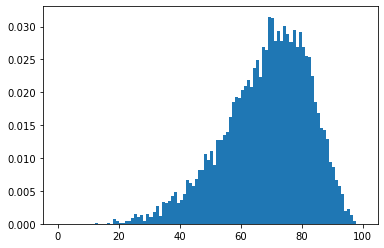

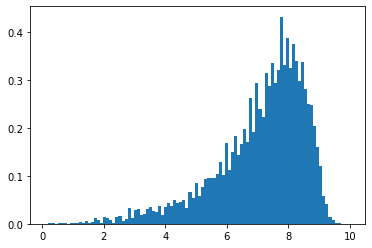

In [8]:
# Изучение распределения величин "оценка критиков", "оценка игроков"
score_query = games_data[['critic_score', 'user_score']]
score_query['user_score'] = score_query['user_score'].replace('tbd', 0).astype('float')
user_score = score_query[score_query['user_score'].notna()]


plt.hist(score_query['critic_score'], bins = 100, density = True, range = (0.1, 100))
plt.show()
plt.hist(user_score['user_score'], bins = 100, density = True, range = (0.1, 10))
plt.show()

Рапределения величин "оценка критиков" и "оценка пользователей" похожи на нормальное распределение случайной величины со смещением среднего вправо(всё таки разработчики стараются), поэтому при увеличении числа экспериментов(эксперимент - проставление оценки) построенные распределения будут меньше "шуметь" и картинка будет сглаживаться. Основываясь на этом предположении я заполнил пропуски в столбцах critic_score и user_score нулями и не включил их в исследование, то есть работал с достоверно известными оценками. На это предположение меня натолкнул срез данных из первых 50 строк с оценками игр и мировыми продажами, в нем я увидел, мягко говоря, сомнительные цифры - достаточно сравнить цифры в 0 и 11 строке. Критики и пользователи - люди непредсказуемые :D

In [9]:
# Заполнение оставшихся пропусков
games_data['user_score'] = games_data['user_score'].replace('tbd', 0).fillna(0).astype('float')
games_data['critic_score'] = games_data['critic_score'].fillna(0)
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
 11  sum_sales        16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


In [10]:
# Заполнение пропусков в столбце "rating"
games_data.info()
print(games_data['rating'].unique())
display(games_data.query('rating == "K-A"'))
rating = games_data[['genre', 'rating']]
rating_dict = rating.dropna().drop_duplicates()
display(rating_dict.query('genre == "Strategy"'))
games_data['rating'] = games_data['rating'].replace('K-A', 'E10+').fillna('RP')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
 11  sum_sales        16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
656,Theme Hospital,PC,1997.0,Strategy,2.30,0.10,0.00,0.00,0.0,9.0,K-A,2.40
903,PaRappa The Rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A,1.91
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,0.0,8.1,K-A,0.01


,genre,rating
218,Strategy,T
656,Strategy,K-A
803,Strategy,E
1078,Strategy,E10+
2810,Strategy,M
13672,Strategy,RP


Обработаем пропуски в столбце Rating.
Рейтинг K-A(Kids to Adults) упразднен в 1998 году, поэтому затесался в эту таблицу, можно смело заменить на Е10+. Однозначно определить рейтинг в соответствии с жанром (есть много разных условий)не удается, нужно каждую игру рассматривать под микроскопом, да и мнение аналитика может не совпасть с мнением ESRB, поэтому заменяем пропуски на значение RP - рейтинг ожидается.

Cрез с данными по стратегиям выведен для примера

In [11]:
# Заполнение пропусков в столбце "год выхода"
year_nan = games_data[games_data['year_of_release'] == np.nan]
display(year_nan.head(15))
release_year = games_data.groupby('platform')['year_of_release'].max().to_dict()

def filler_func(row):
    if pd.isna(row['year_of_release']):
        return release_year.get(row['platform'])
    return row['year_of_release']

games_data['year_of_release'] = games_data.apply(filler_func, axis = 1)
games_data['year_of_release'] = pd.to_datetime(games_data['year_of_release'], format = '%Y').dt.year
games_data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  sum_sales        16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Обработка пропусков в столбце year_of_release.
Принято решение заменить пропуски последними годами, которые встречаются для конкретной игровой платформы, 
т.к. достоверно заполнить пропуски не удастся (либо надо потратить уйму времени на поиск информации по каждой 
игре в интернете). Всего таких пропусков 269, так что для "перспективных" платформ, которые рассматриваются ниже такое заполнение не исказит общую картину

## Вывод

Выполнена предобработка данных и подготовка их к анализу. Данные в столбце year_of_release приведены к формату datetime64, в столбце user_score к формату float 64. Где это было возможно заполнены пропуски.

[Наверх](#step7)

## Шаг 3. Анализ полученных данных <a name="step3"></a>

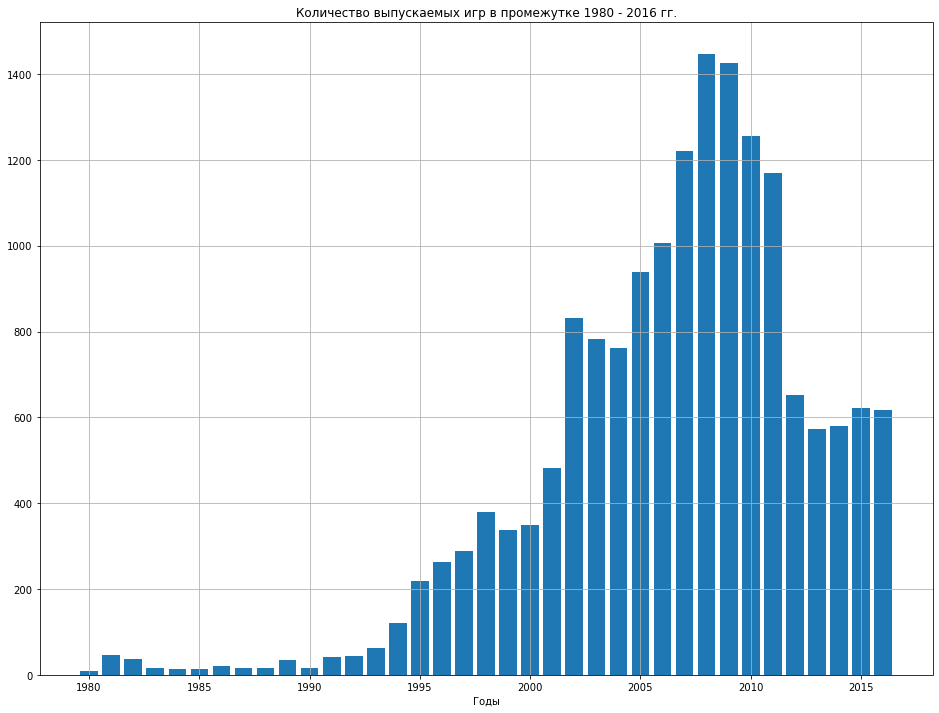

In [12]:
# Проверяем сколько игр выпускалось в разные годы
count_by_year = games_data.groupby('year_of_release')['platform'].count().reset_index()

plt.figure(figsize = (16,12))
plt.bar(count_by_year['year_of_release'], count_by_year['platform'])
plt.title('Количество выпускаемых игр в промежутке 1980 - 2016 гг.')
plt.xlabel('Годы')
plt.grid(True)
plt.show()

Промежуточный вывод: до 1995-го года игровая индустрия была не популярна, в год продавалось менее 200 млн. копий игр для всевозможных платформ. Пик индустрии приходится на 2007-2010 годы, затем идет спад до 600 млн. копий в год. Данные до 2000-го годов не важны для анализа, можно их не рассматривать (хотя есть легендарные игры типа "МК" или "Mario Bros.", но это скорее исключение).

,platform,sum_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

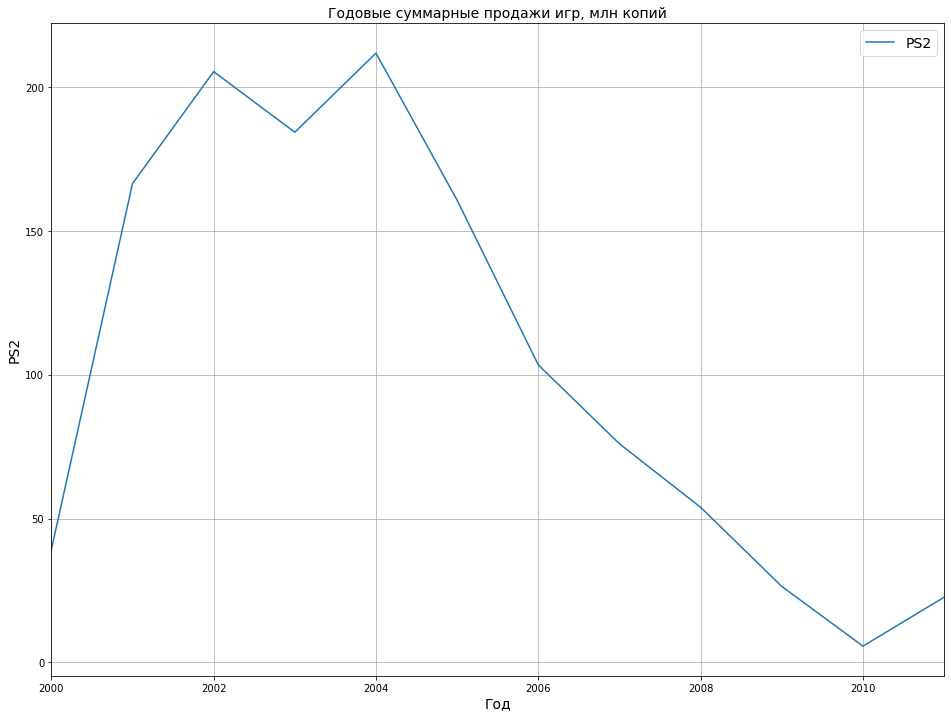

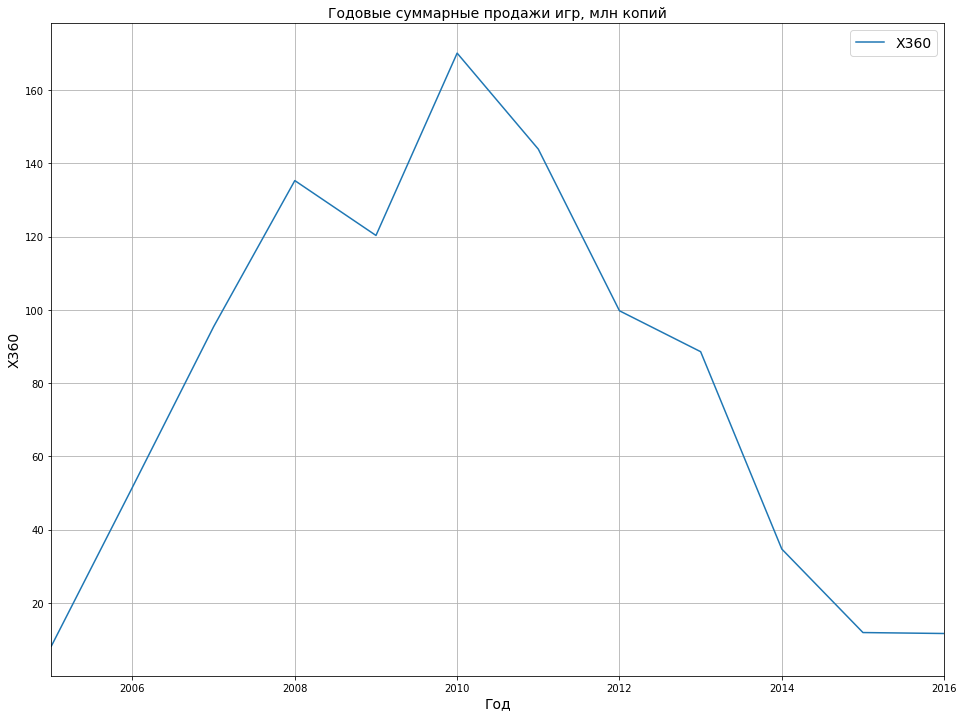

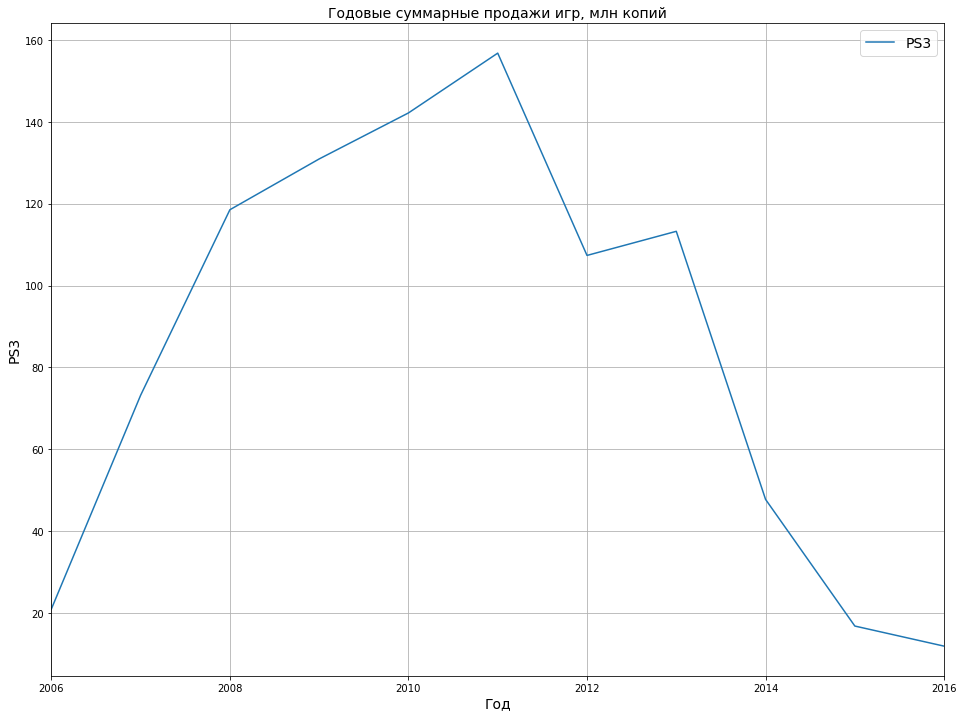

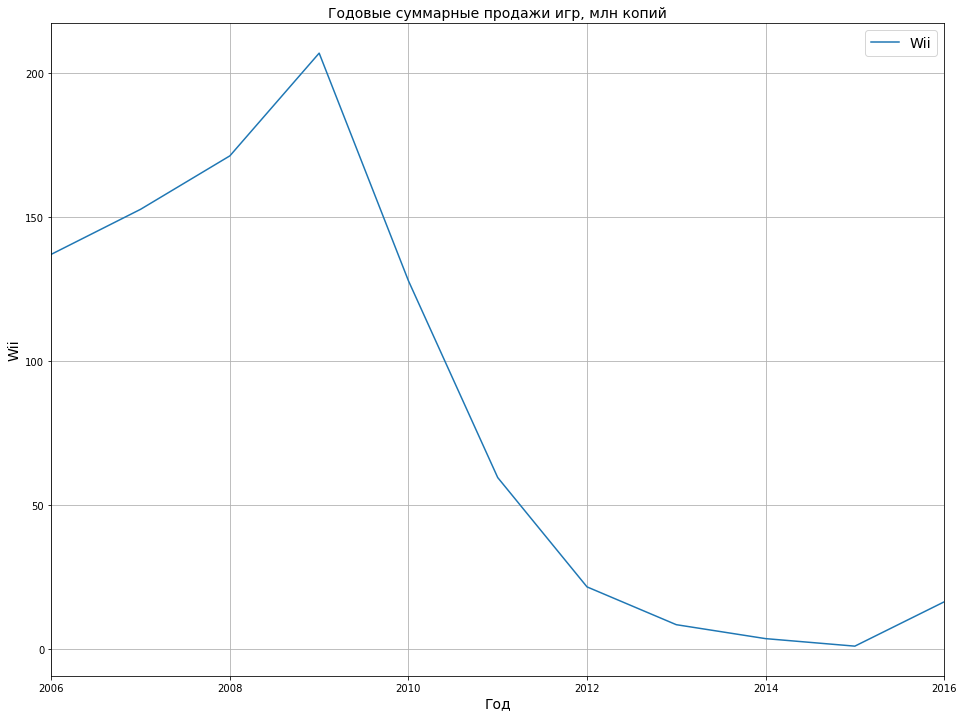

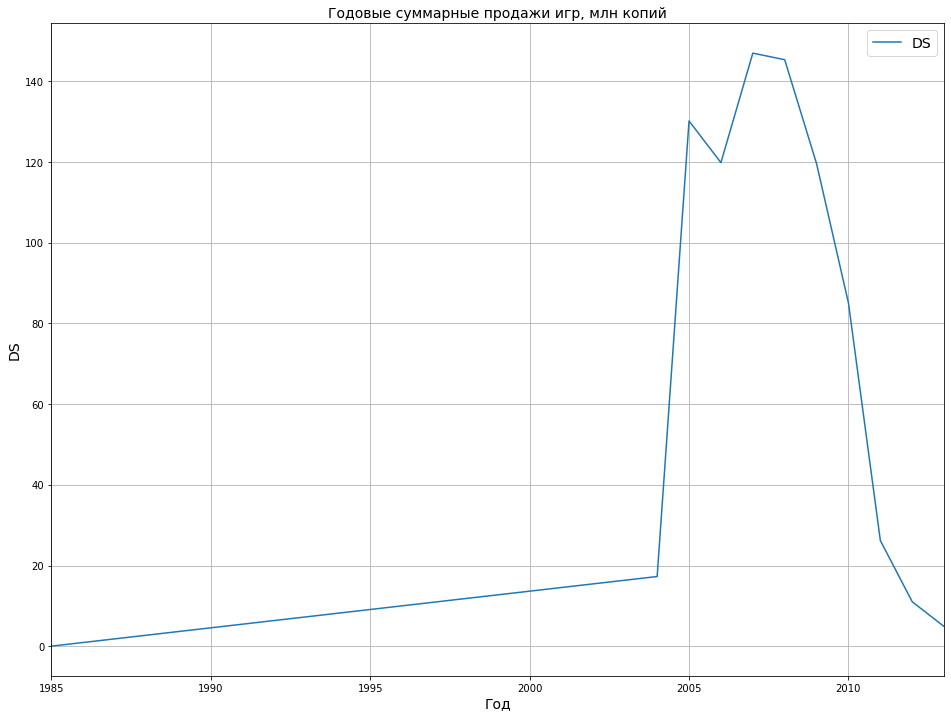

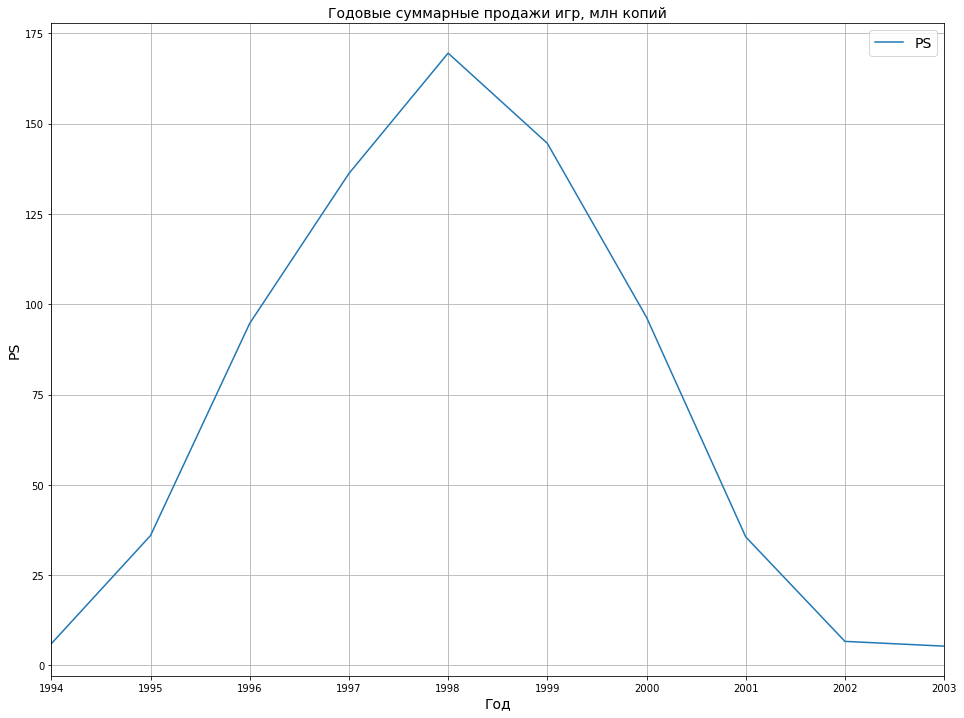

In [13]:
# Построим распределение продаж по платформам, и учтем распределение по годам
sales_by_platforms = games_data.pivot_table(index = ['platform', 'year_of_release'], values= 'sum_sales', aggfunc= 'sum').reset_index()

biggest_sales = games_data.groupby('platform')['sum_sales'].sum().sort_values(ascending = False).reset_index()
display(biggest_sales.head(10))  

platform_names = biggest_sales[biggest_sales['sum_sales'] > 700.00]['platform'].to_list()
display(platform_names)

#Табличка с цифрами это конечно хорошо, но лучше визуализировать полученные данные. Выполняю построение графиков с помощью цикла
for i in range(len(platform_names)):
    platforms = sales_by_platforms[sales_by_platforms['platform'] == platform_names[i]]        #переменная для хранения срезов таблицы, по которым построены графики ниже
    plt.figure(figsize = (16, 12))
    plt.plot(platforms['year_of_release'], platforms['sum_sales'], label = platform_names[i])
    plt.xlim(platforms['year_of_release'].min(), platforms['year_of_release'].max())
    plt.xlabel('Год', fontsize = 14)
    plt.ylabel(platform_names[i], fontsize = 14)
    plt.title('Годовые суммарные продажи игр, млн копий', fontsize = 14)
    plt.grid(True)
    plt.legend(fontsize = 14)
plt.show()

Лидеры продаж - PS2, X360, PS3, Wii, DS, PS. В среднем игровая платформа "живёт" 5-6 лет(на графиках промежуток от подъема до резкого падения продаж), что очень хорошо отслеживается на примере платформы Playstation (3 представителя в топе)- как только начиналось падение продаж для одной версии консоли, выходила следующая версия. Период актуальности для дальнейшего анализа выбираю 2011-2016 гг.

In [14]:
# Срез данных с периодом актуальности
games_data_act = games_data[games_data['year_of_release'] >= 2011]


В актуальный период продажи игр всех "живых" платформ снижаются, что неудивительно - с 2012 года продажи игр в целом снижаются. Потенциально прибыльными выберем 7 платформ, для которых продано более 100 млн. копий игр - PS3, X360, PS4, 3DS, XOne, Wii и PC.

['3DS', 'DS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']


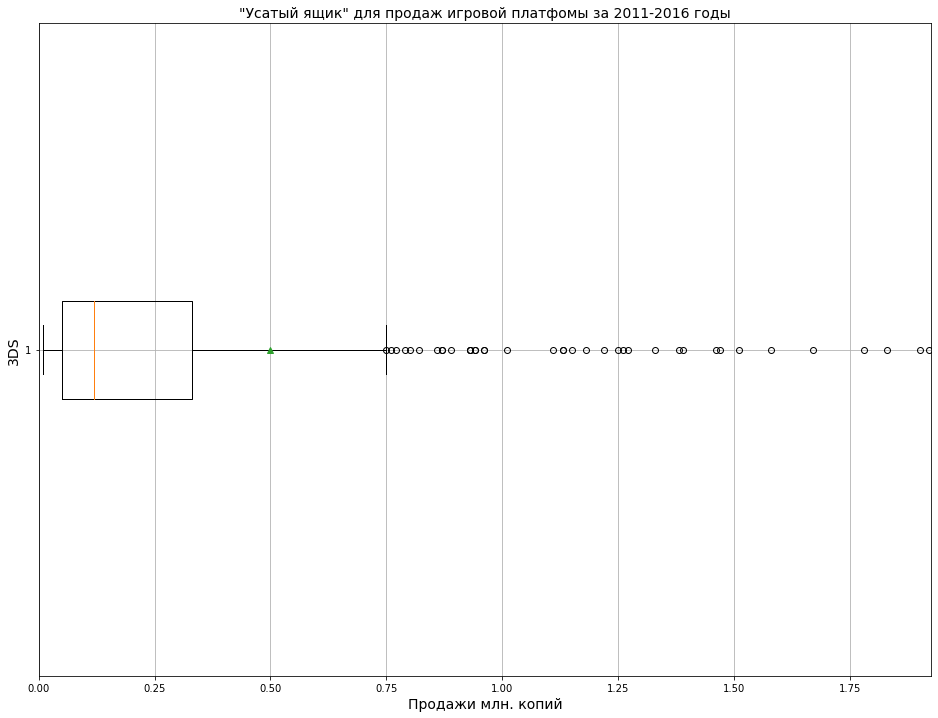

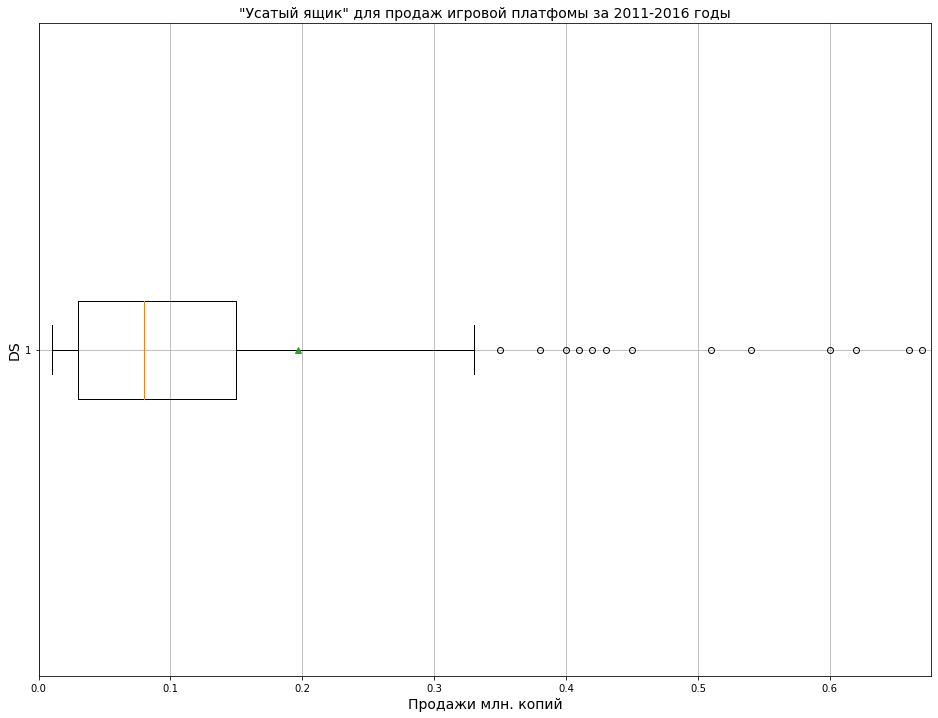

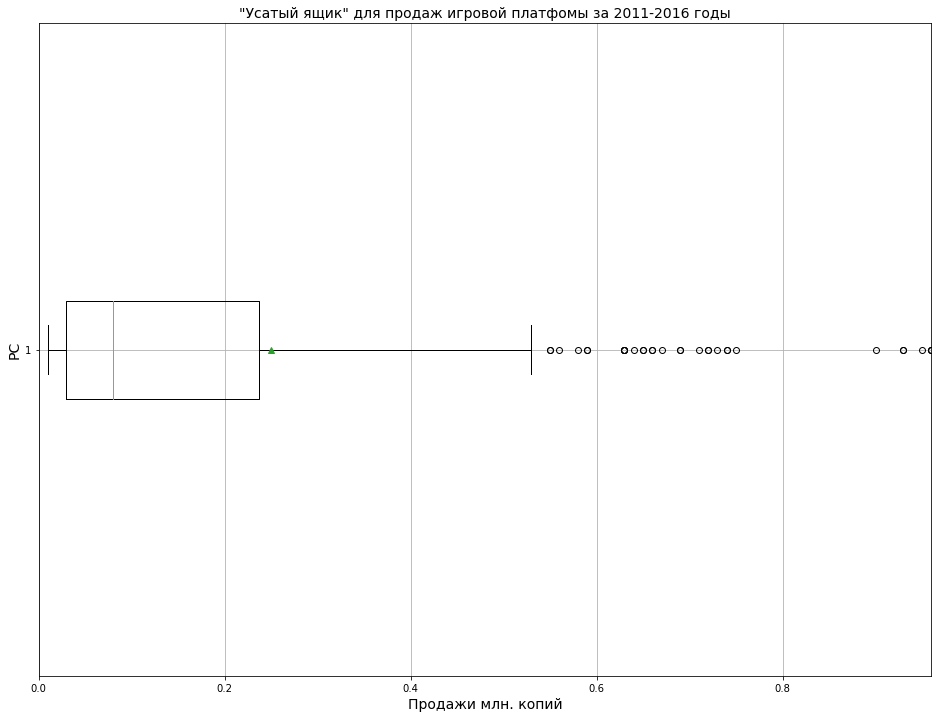

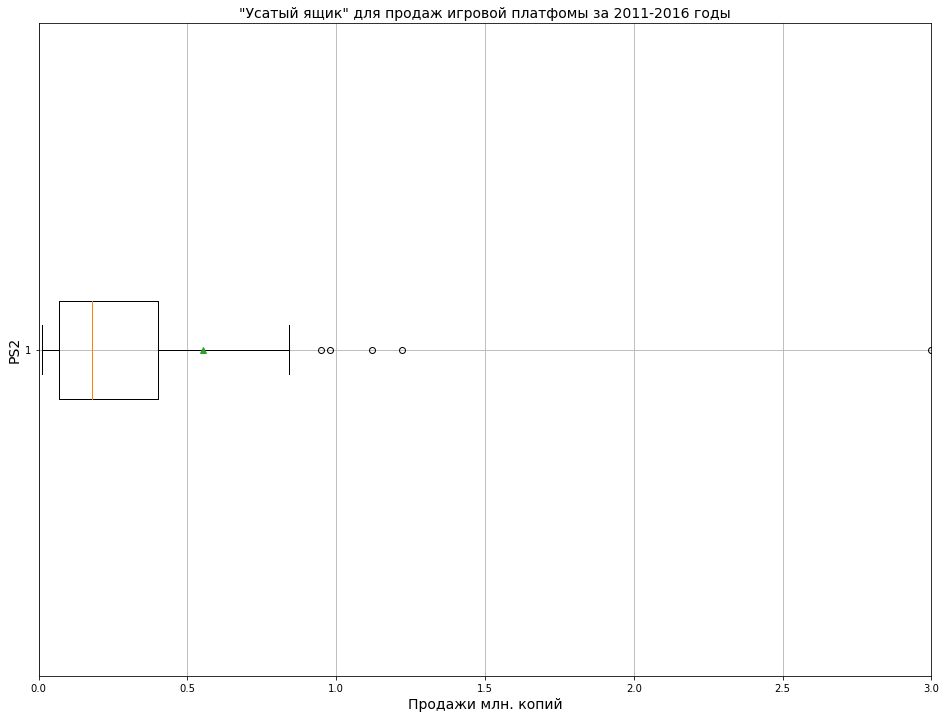

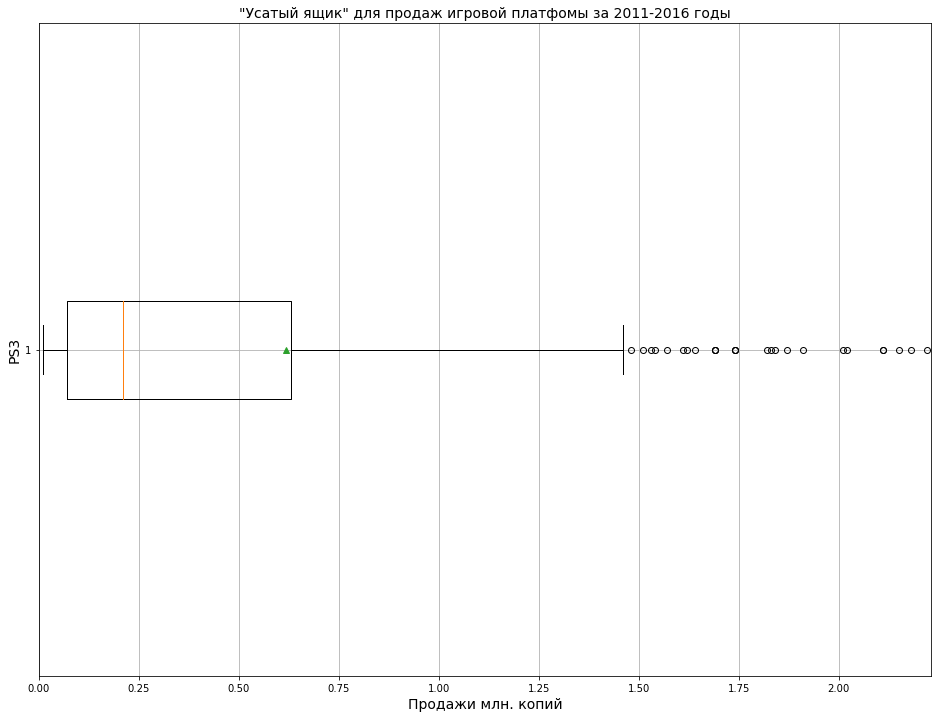

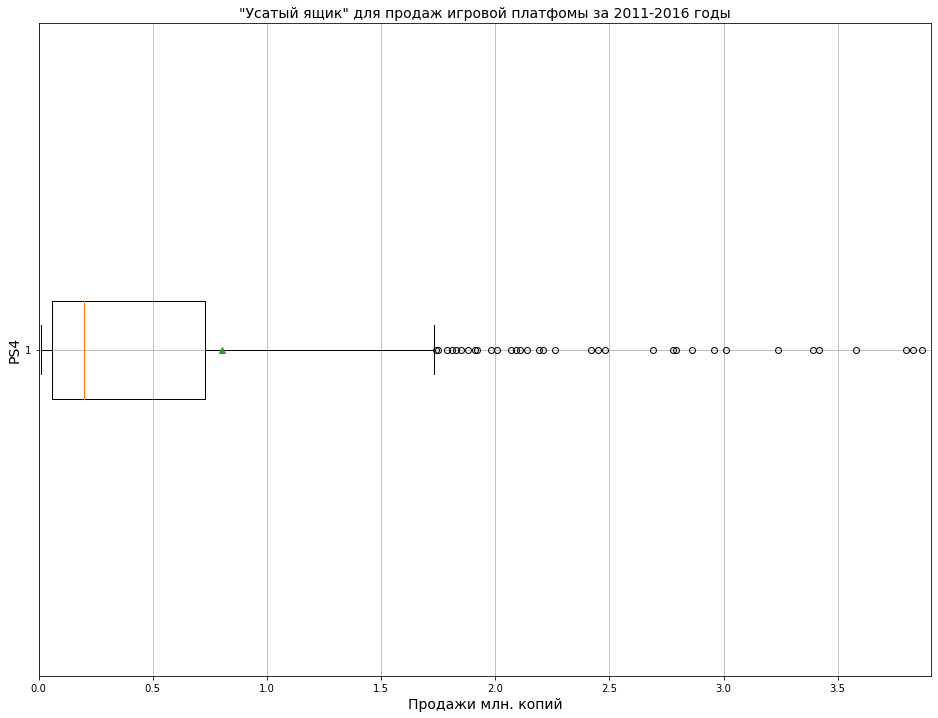

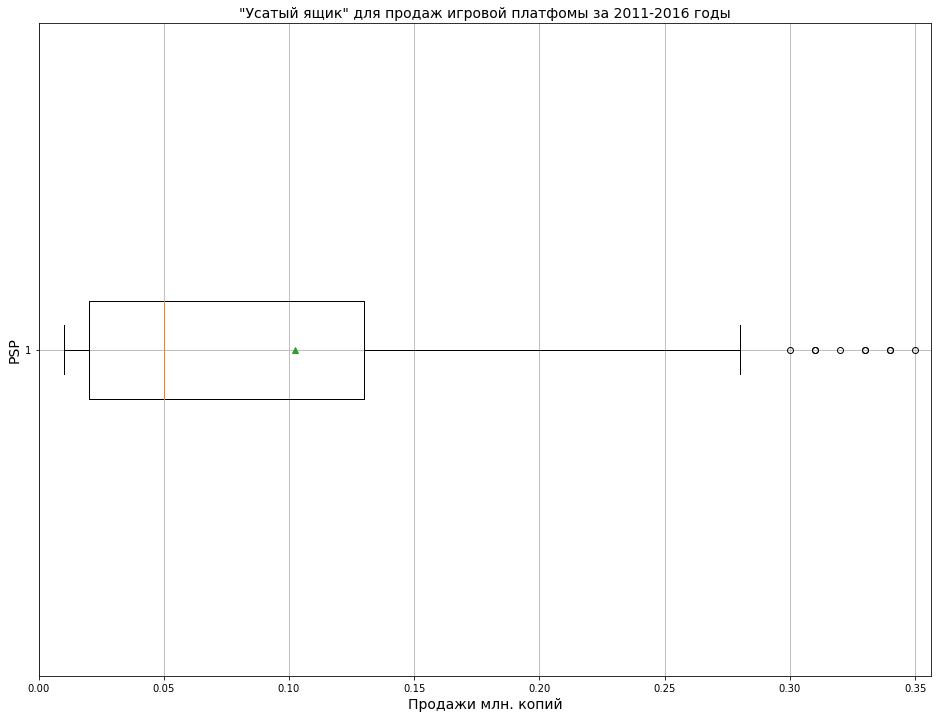

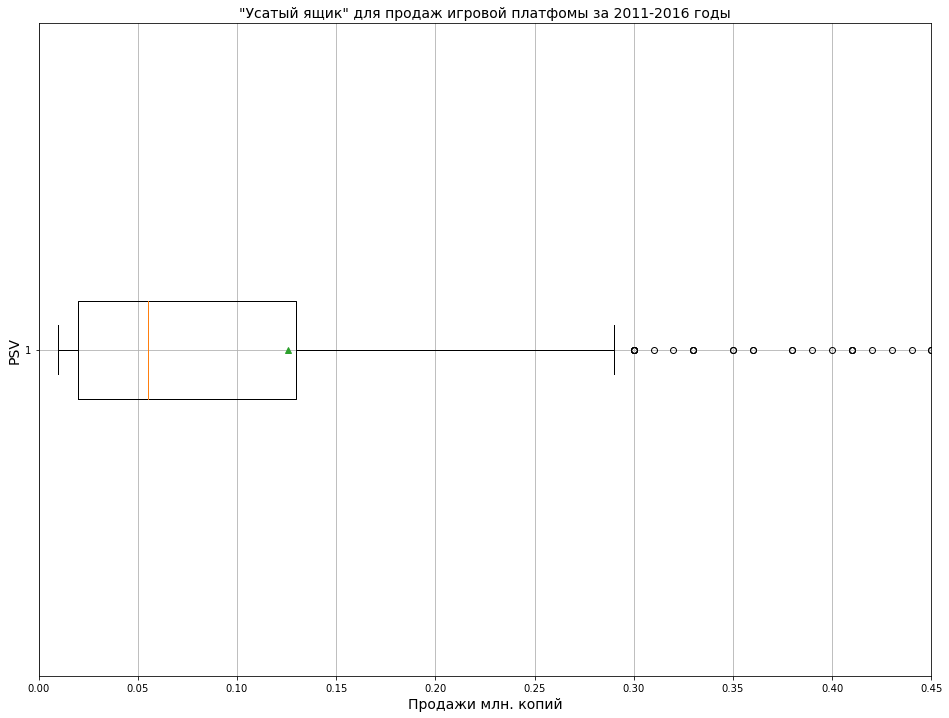

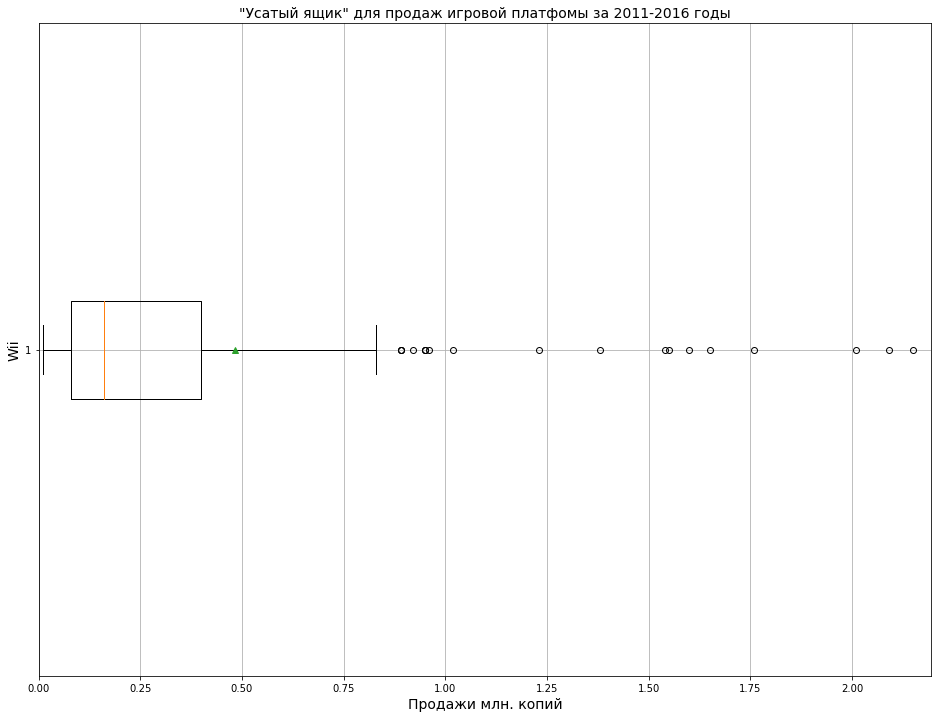

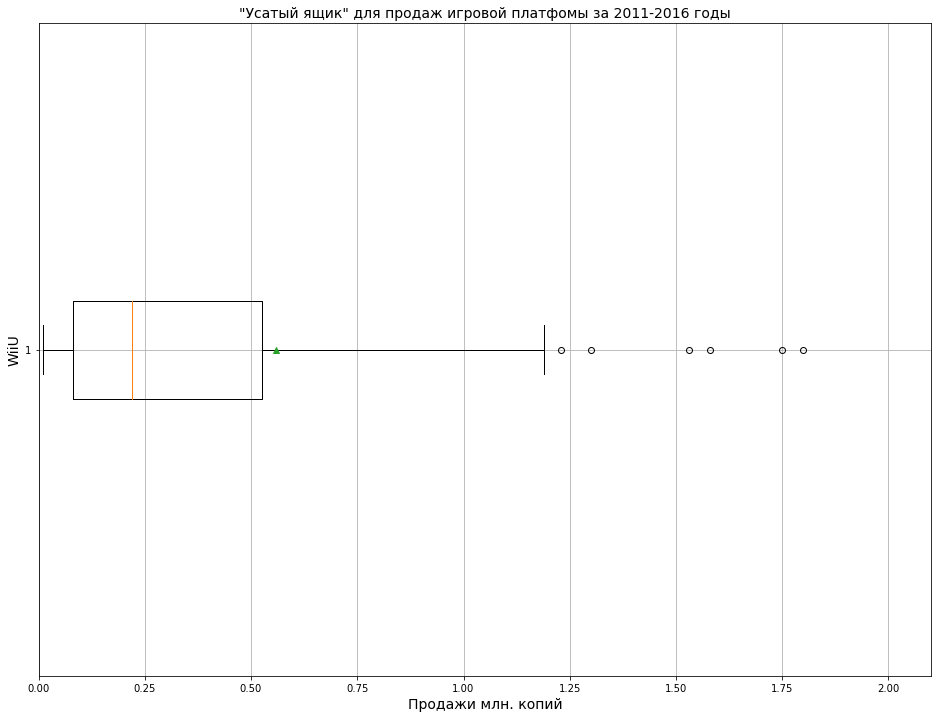

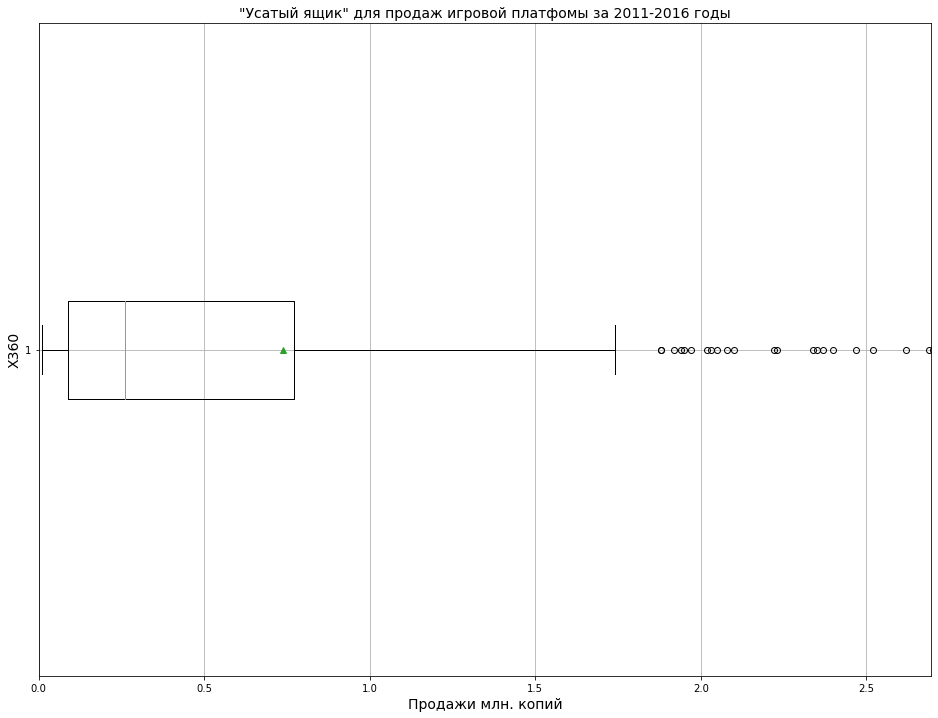

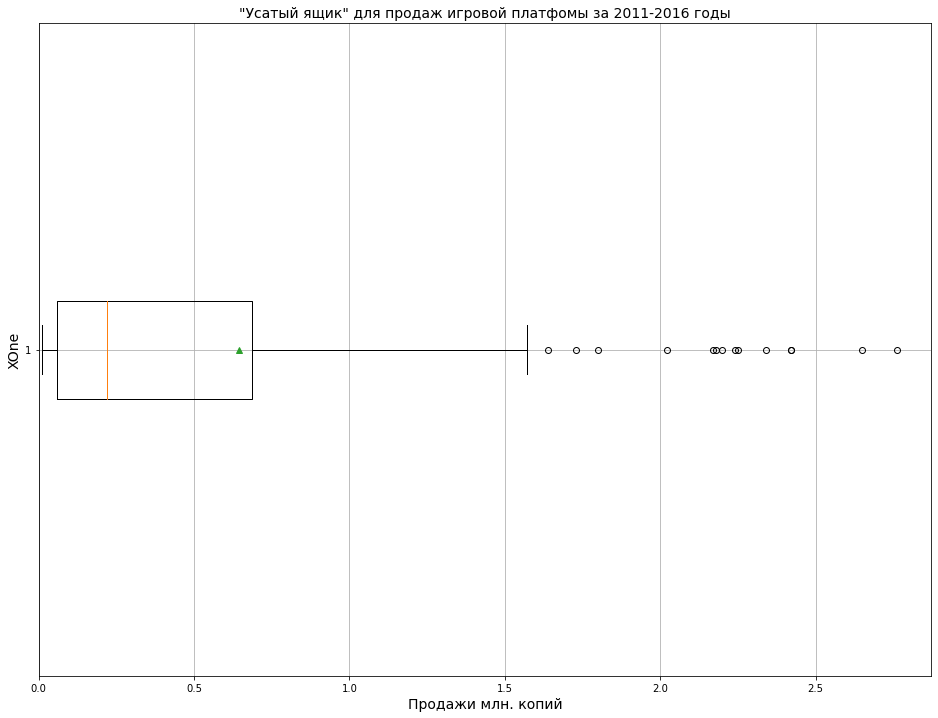

In [15]:
#Построение "Ящиков с усами" для значений мировых продаж с разделением по игровым платформам
box_list = games_data_act.groupby('platform')['sum_sales'].sum().index.to_list()
print(box_list)


for i in range(len(box_list)):
    boxes = games_data_act[games_data_act['platform'] == box_list[i]]
    plt.figure(figsize = (16, 12))
    plt.boxplot(boxes['sum_sales'], vert = False, showmeans = True, showfliers = True)
    plt.xlim(0, boxes['sum_sales'].quantile(q=0.95))
    plt.xlabel('Продажи млн. копий', fontsize = 14)
    plt.ylabel(box_list[i], fontsize = 14)
    plt.title('"Усатый ящик" для продаж игровой платфомы за 2011-2016 годы', fontsize = 14)
    plt.grid(True)
    #plt.legend()
plt.show()

На всех "Усатых ящиках" медианное значение смещено сильно влево от среднего - очень много игрового "мусора" разработано и, соответственно, продажи его ничтожны по сравнению с сердняками и гигантами. А вот за правым "усом" находятся не выбросы, а успешные игры. Стоит обратить особое внимание на 3DS, PS4 и XBox360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42.0,2.3,E10+,0.01
16499,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70.0,6.8,T,0.01
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,RP,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01


,critic_score,user_score,sum_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
sum_sales,0.405895,-0.033625,1.000000


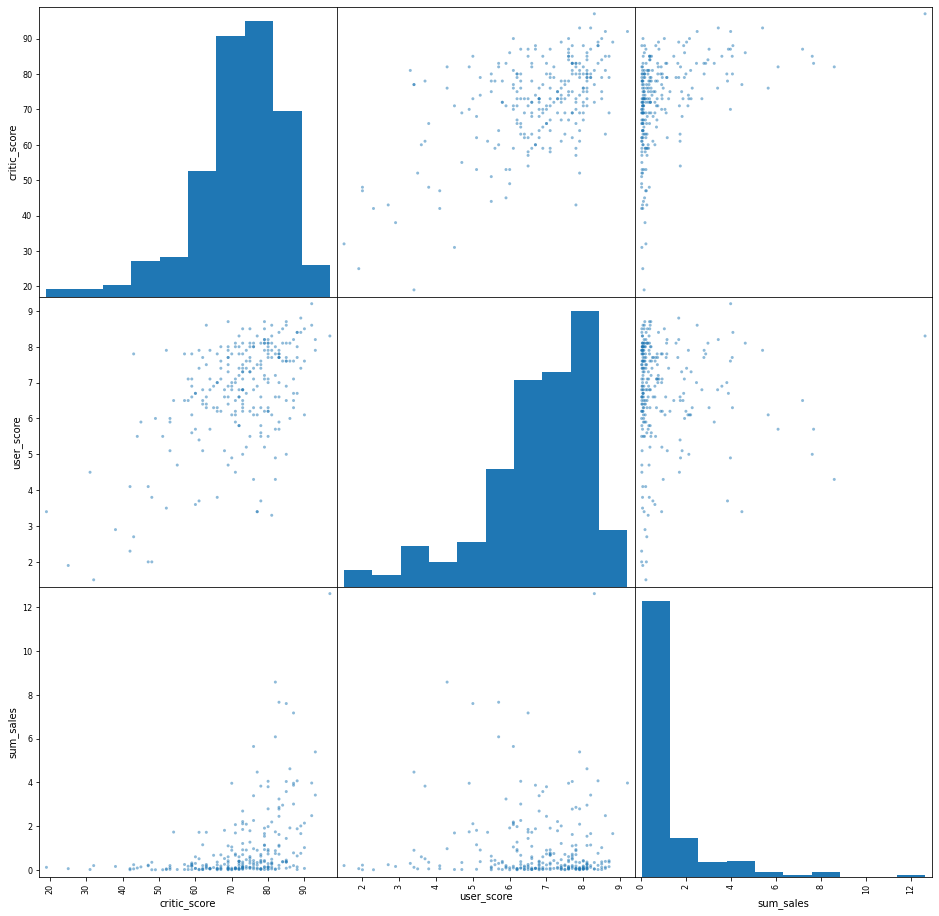

In [16]:
#Построим диаграмму рассеяния для оценок критиков/пользователей и мировых продаж для платформы PS4
platform_corr = games_data_act[(games_data_act['critic_score'] != 0) & (games_data_act['user_score'] != 0)] #исключаем "нулевые" отзывы из рассмотрения
ps_4 = platform_corr[platform_corr['platform'] == 'PS4']
display(ps_4)

corr_df_ps4 = ps_4[['critic_score', 'user_score', 'sum_sales']]
display(corr_df_ps4.corr()) #построение матрицы корреляции 
pd.plotting.scatter_matrix(corr_df_ps4, figsize=(16, 16))      #построение диаграммы рассеяния
plt.show()

Для платформы PS4 построена матрица корреляции и диаграмма рассеяния для поиска зависимости между продажами игры и оценками критиков пользователей. Значение коэффициента корреляции не подтверждает прямой зависимости между оценками игры и её продажами. Но посмотрев на диаграмму рассеяния можно с уверенностью сказать, что игры с оценкой критиков ниже 50, и оценкой игроков ниже 3 точно не имеют коммерческого успеха.

['3DS', 'DS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']


,platform,critic_score,user_score,sum_sales
16,PS3,97.0,8.2,21.05
23,X360,97.0,8.1,16.27
29,X360,88.0,3.4,14.73
34,PS3,83.0,5.3,13.79
35,X360,83.0,4.8,13.68
...,...,...,...,...
16652,WiiU,81.0,8.5,0.01
16660,XOne,74.0,6.7,0.01
16692,PC,80.0,7.6,0.01
16696,PC,61.0,5.8,0.01


'матрица корреляции для'

'3DS'

,critic_score,user_score,sum_sales
critic_score,1.000000,0.744168,0.339824
user_score,0.744168,1.000000,0.233403
sum_sales,0.339824,0.233403,1.000000


'матрица корреляции для'

'DS'

,critic_score,user_score,sum_sales
critic_score,1.000000,0.893557,0.256482
user_score,0.893557,1.000000,0.153930
sum_sales,0.256482,0.153930,1.000000


'матрица корреляции для'

'PC'

,critic_score,user_score,sum_sales
critic_score,1.000000,0.475949,0.308781
user_score,0.475949,1.000000,-0.064522
sum_sales,0.308781,-0.064522,1.000000


'матрица корреляции для'

'PS2'

,critic_score,user_score,sum_sales
critic_score,1.000000,0.446009,0.562768
user_score,0.446009,1.000000,0.034346
sum_sales,0.562768,0.034346,1.000000


'матрица корреляции для'

'PS3'

,critic_score,user_score,sum_sales
critic_score,1.000000,0.559559,0.375743
user_score,0.559559,1.000000,0.025473
sum_sales,0.375743,0.025473,1.000000


'матрица корреляции для'

'PS4'

,critic_score,user_score,sum_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
sum_sales,0.405895,-0.033625,1.000000


'матрица корреляции для'

'PSP'

,critic_score,user_score,sum_sales
critic_score,1.000000,0.615424,0.210066
user_score,0.615424,1.000000,0.036014
sum_sales,0.210066,0.036014,1.000000


'матрица корреляции для'

'PSV'

,critic_score,user_score,sum_sales
critic_score,1.000000,0.733471,0.131349
user_score,0.733471,1.000000,0.038374
sum_sales,0.131349,0.038374,1.000000


'матрица корреляции для'

'Wii'

,critic_score,user_score,sum_sales
critic_score,1.000000,0.412379,0.251458
user_score,0.412379,1.000000,0.137548
sum_sales,0.251458,0.137548,1.000000


'матрица корреляции для'

'WiiU'

,critic_score,user_score,sum_sales
critic_score,1.000000,0.770080,0.350882
user_score,0.770080,1.000000,0.391848
sum_sales,0.350882,0.391848,1.000000


'матрица корреляции для'

'X360'

,critic_score,user_score,sum_sales
critic_score,1.000000,0.549182,0.392341
user_score,0.549182,1.000000,0.023711
sum_sales,0.392341,0.023711,1.000000


'матрица корреляции для'

'XOne'

,critic_score,user_score,sum_sales
critic_score,1.000000,0.472462,0.410422
user_score,0.472462,1.000000,-0.094003
sum_sales,0.410422,-0.094003,1.000000


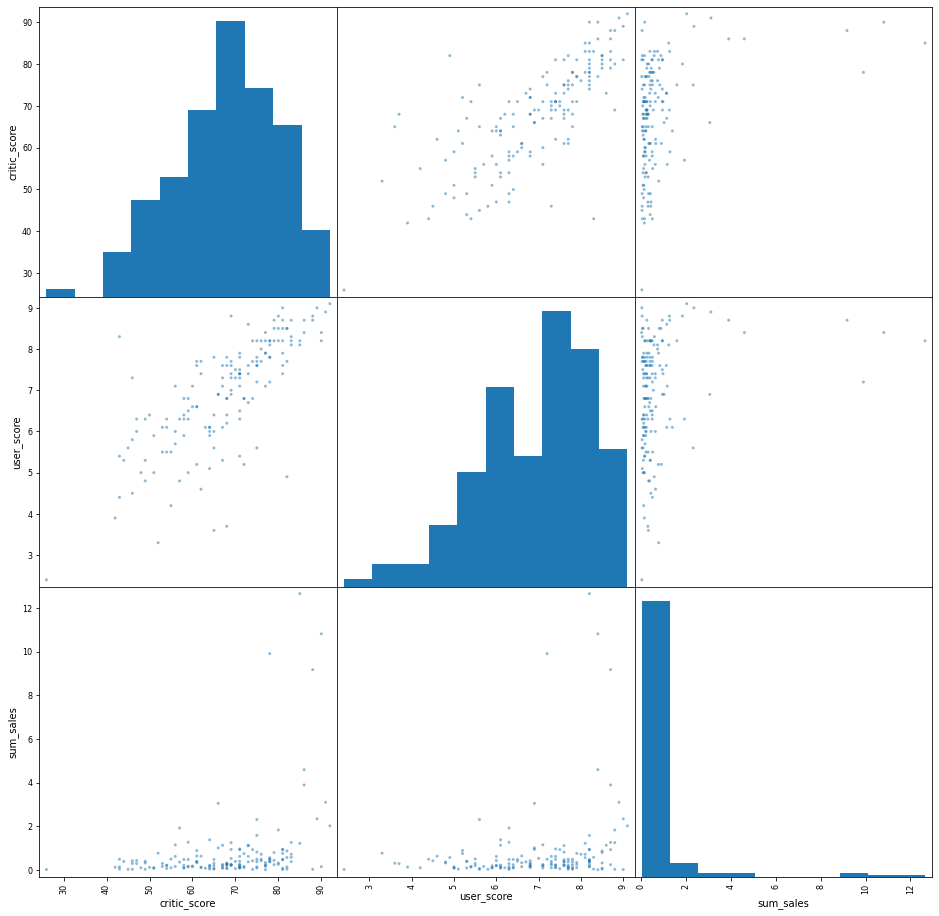

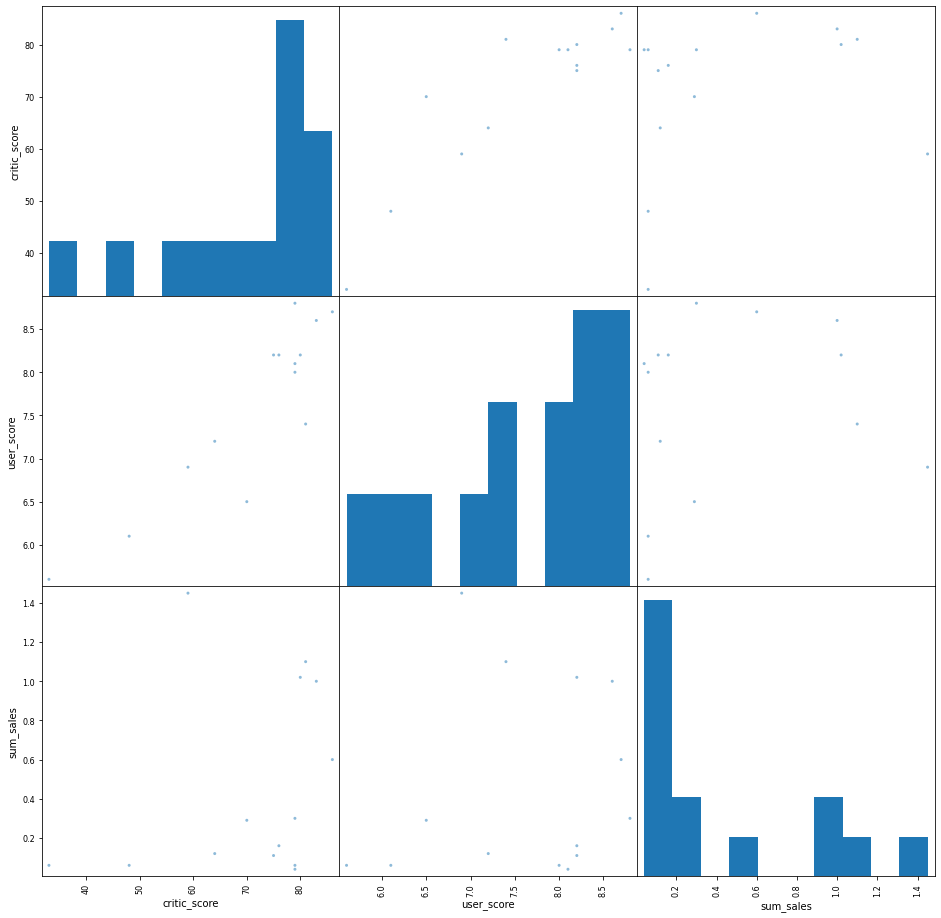

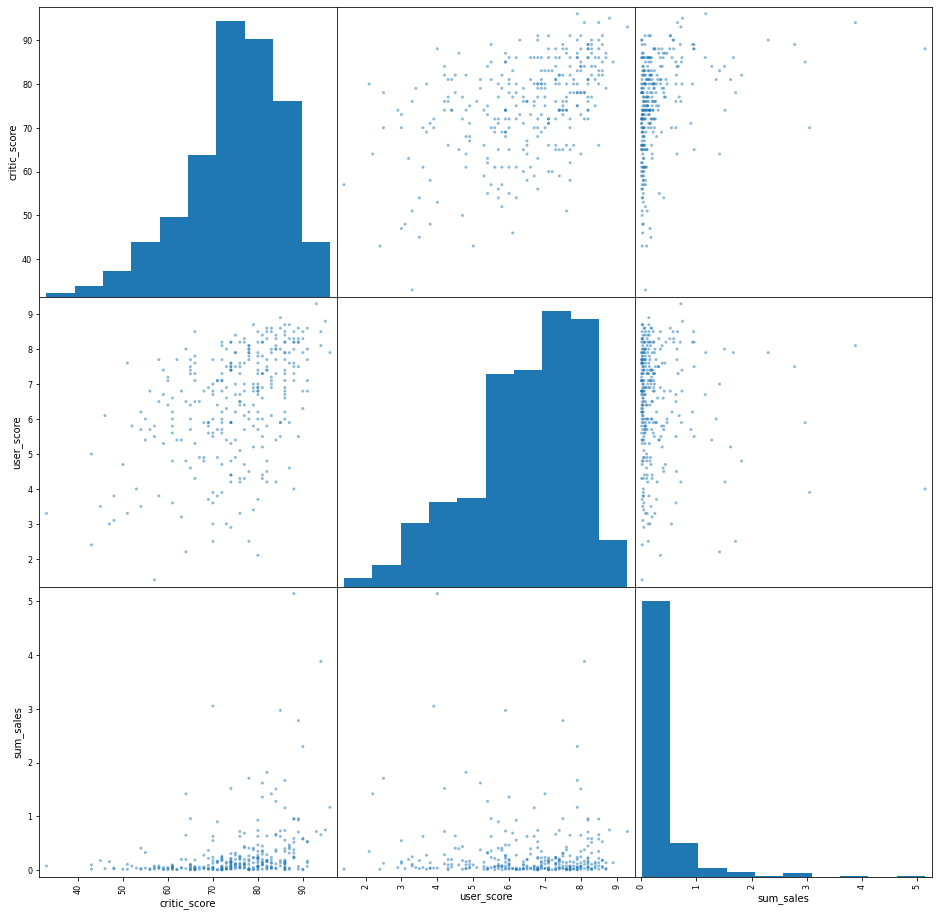

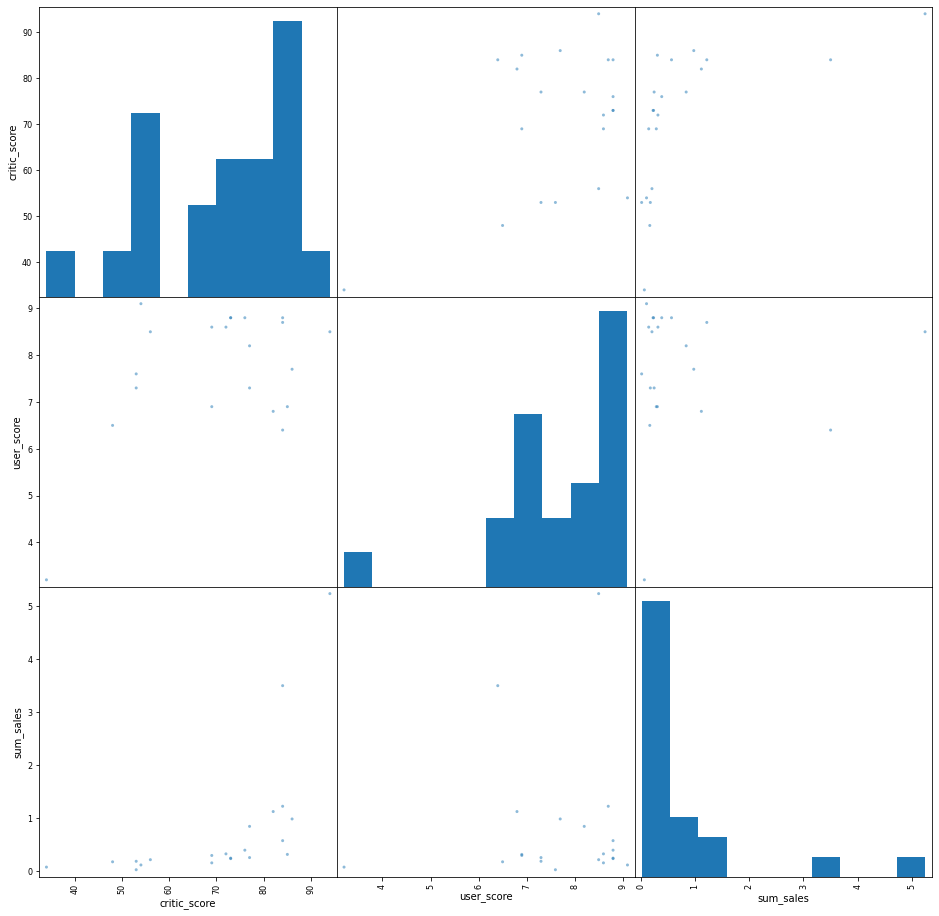

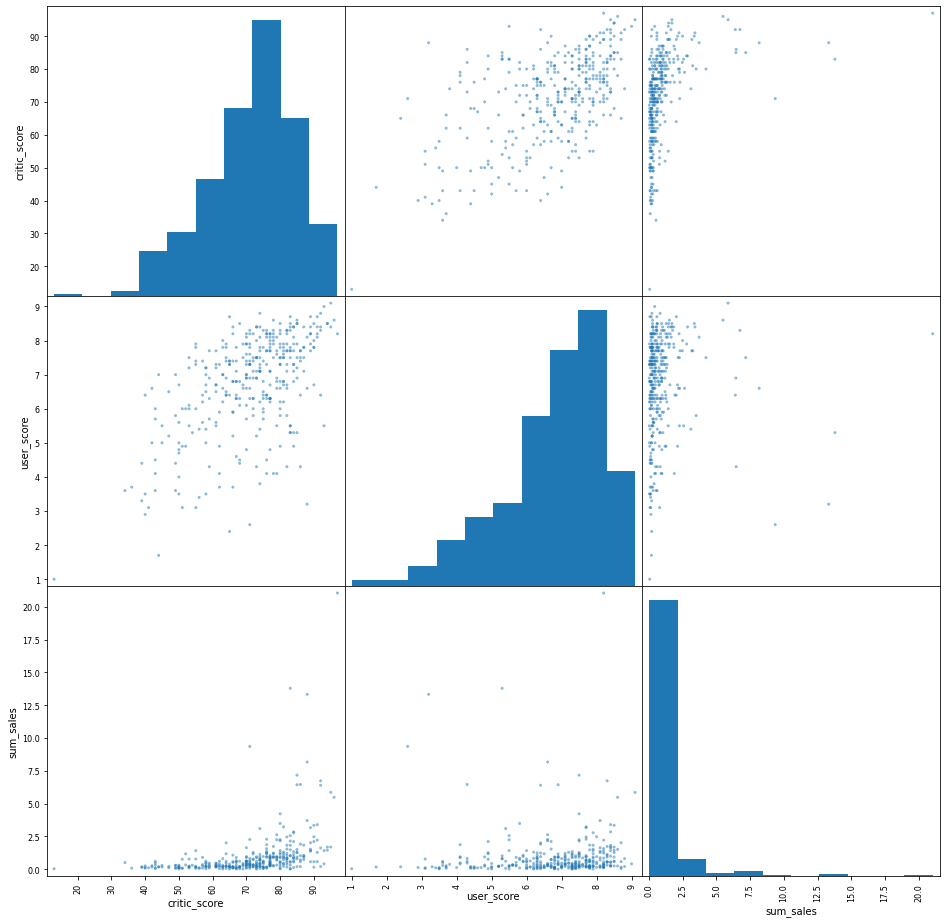

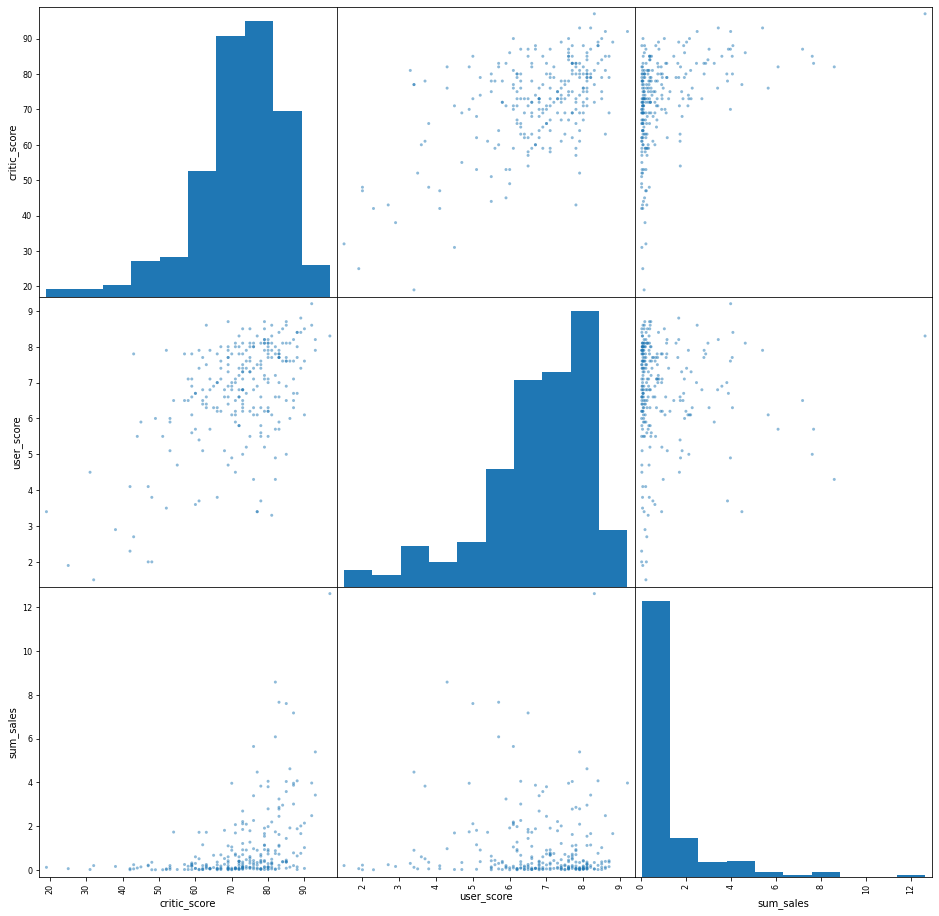

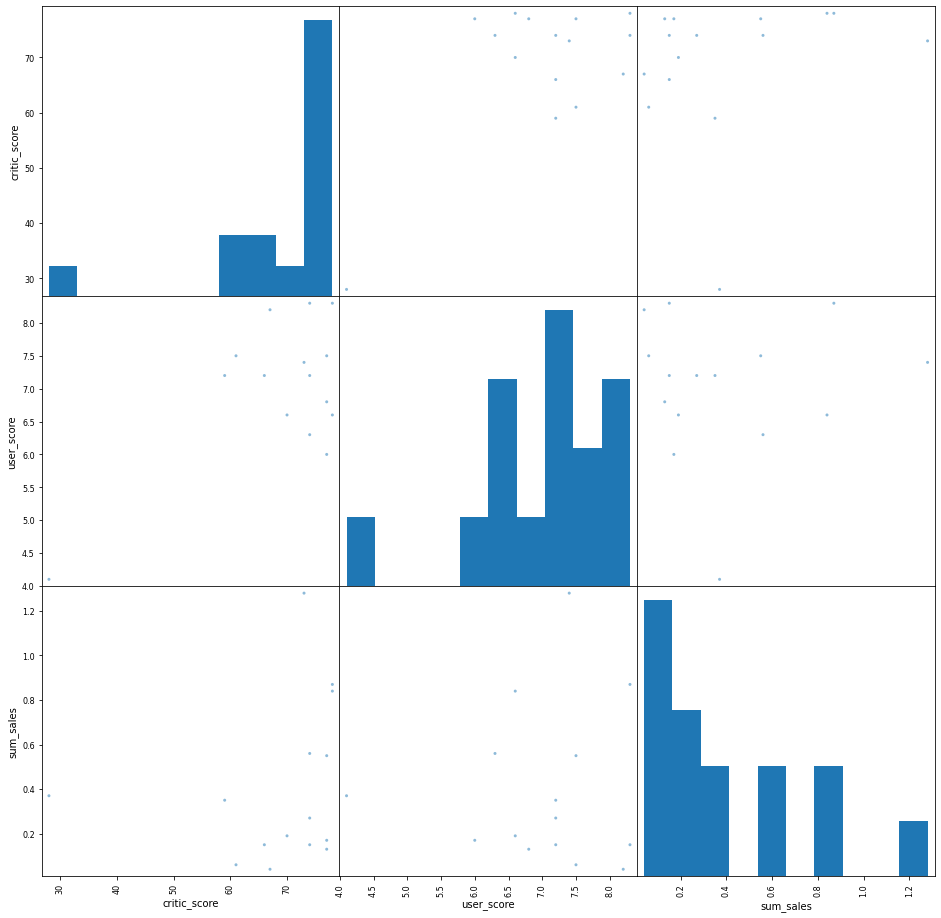

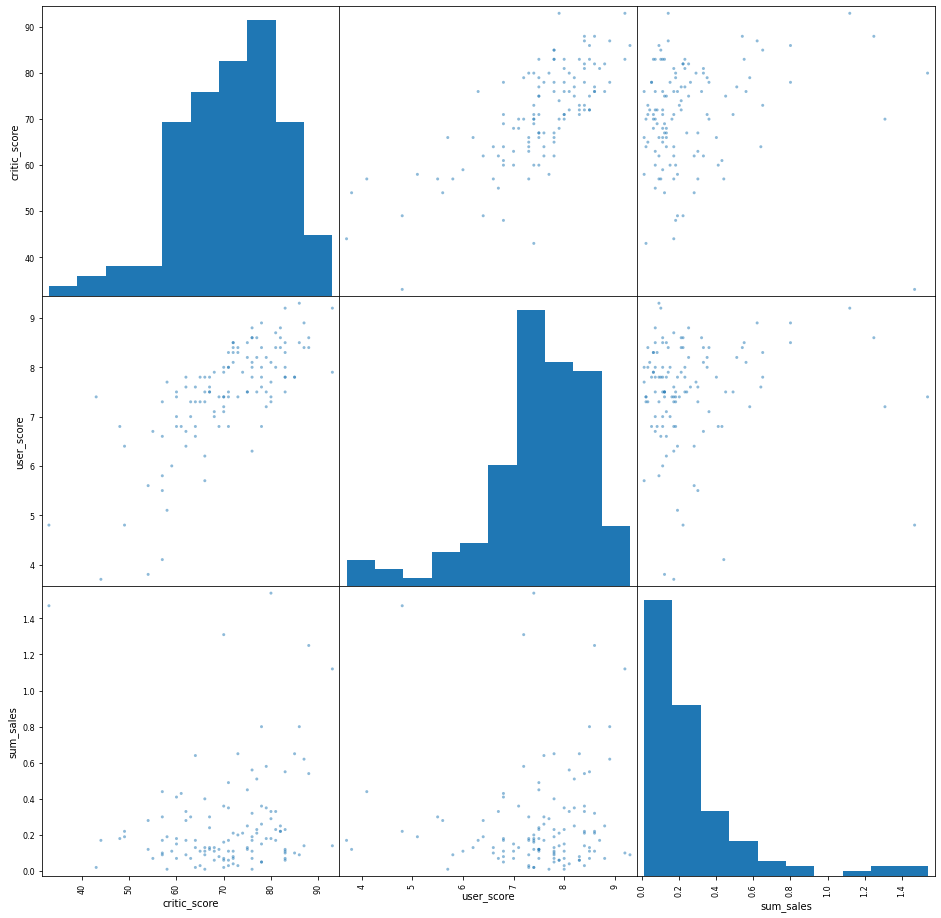

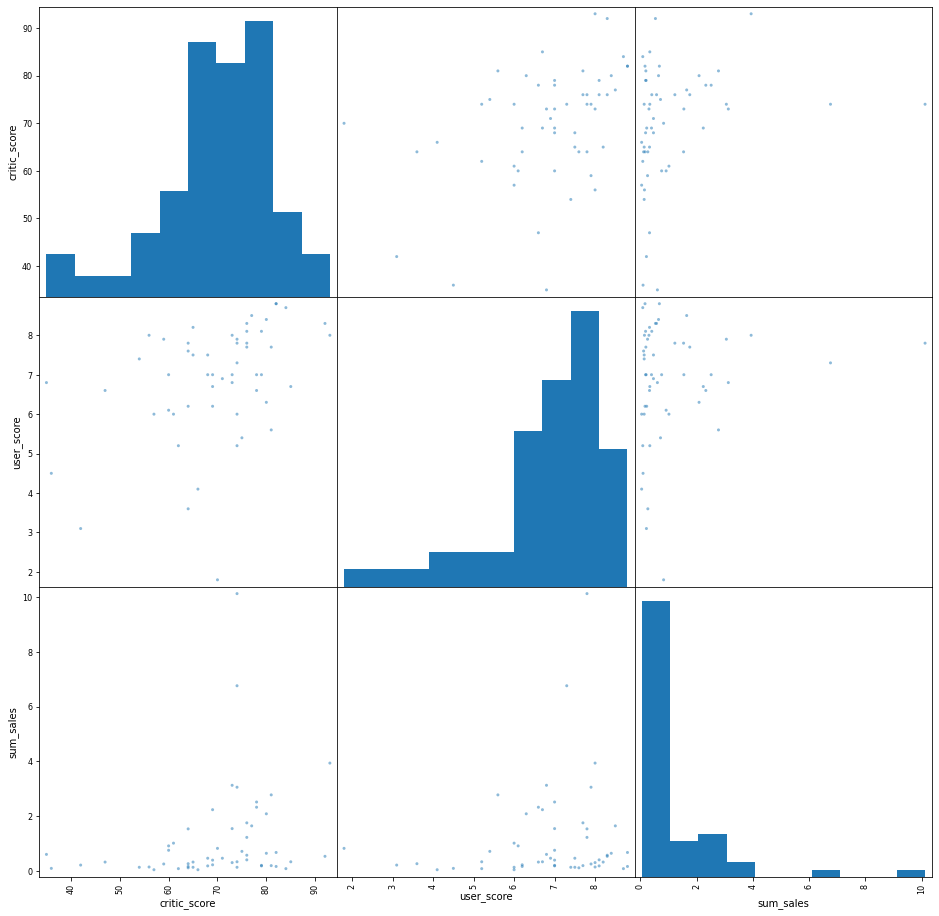

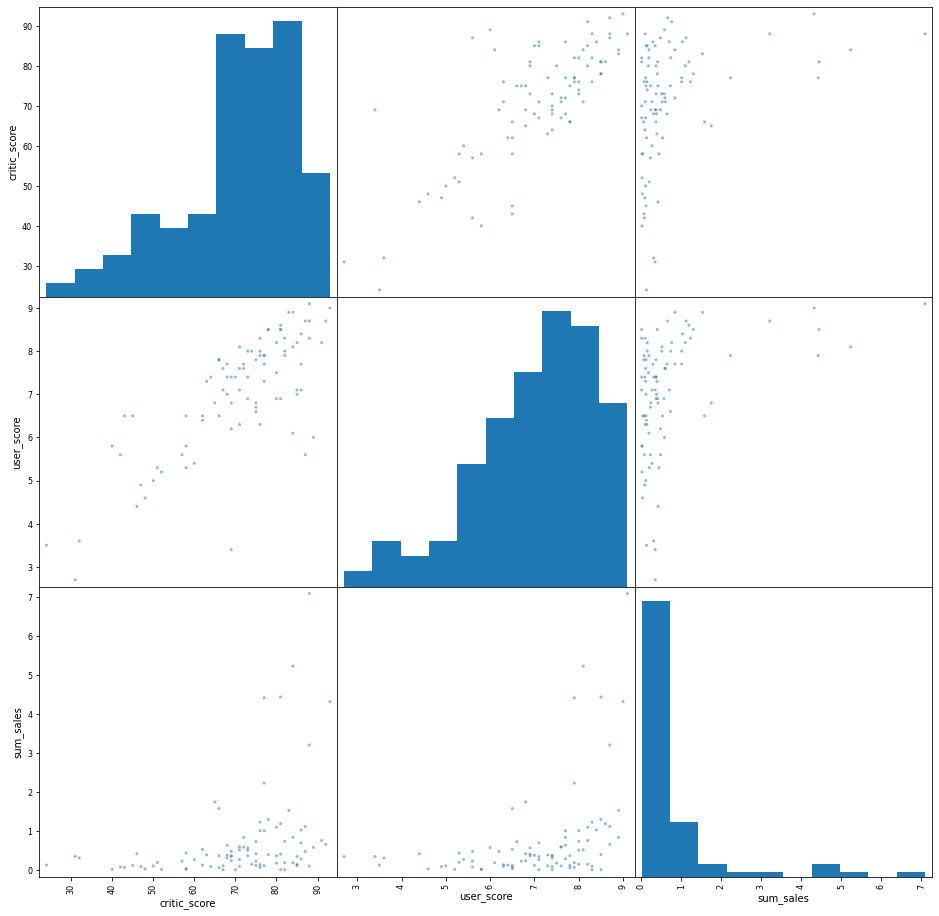

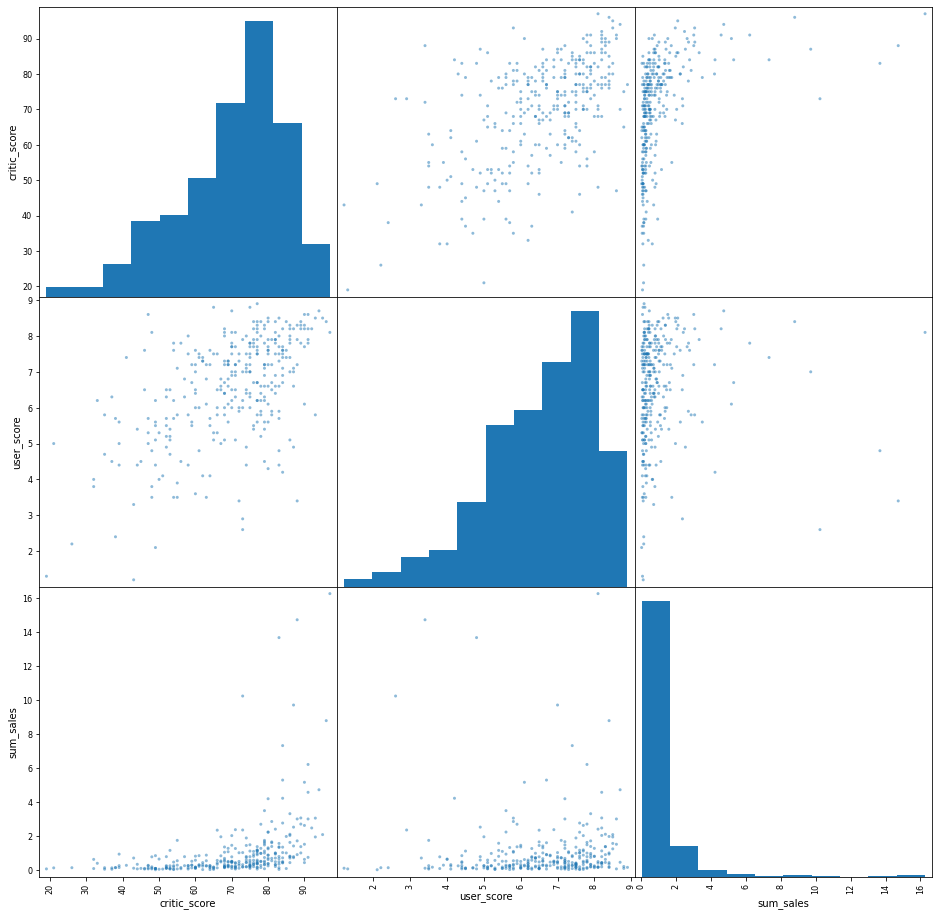

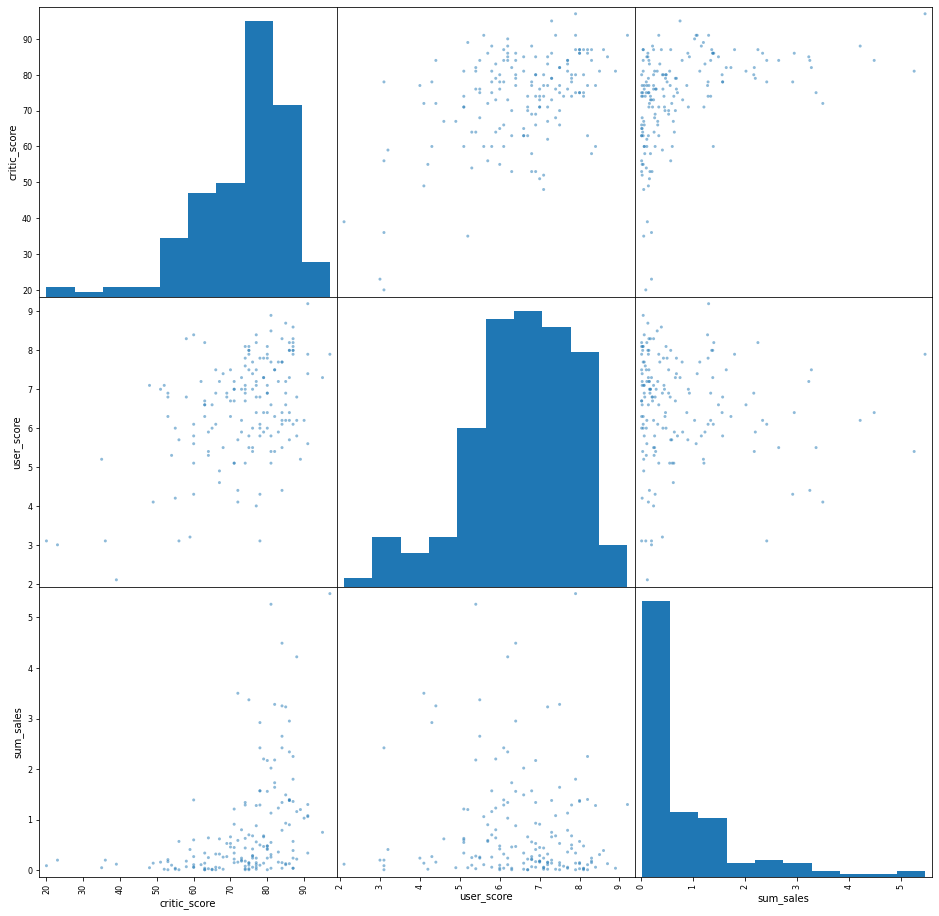

In [17]:
#Постороим матрицы корреляций для других "живых" игровых платформ
matrix_list = box_list
query = platform_corr[['platform', 'critic_score', 'user_score', 'sum_sales']]
print(matrix_list)    
display(query)

for i in range(len(matrix_list)):
    matrix_corr = query[query['platform'] == matrix_list[i]]
    display('матрица корреляции для', matrix_list[i], matrix_corr.corr())
    pd.plotting.scatter_matrix(matrix_corr, figsize=(16, 16))

Промежуточный вывод - корреляции между продажами и отзывами критиков/пользователей не выявлено. Для платформы PS2 получено значение коэффициента корреляции 0.56, но это малое значение, чтобы говорить о прямой связи продаж с оценками критиков, да и сама платформа уже устарела. Построенные диаграммы рассеяния подтверждают вывод сделанный для платформы PS4 - не стоит связываться с играми с низкими оценками пользователей/критиков.

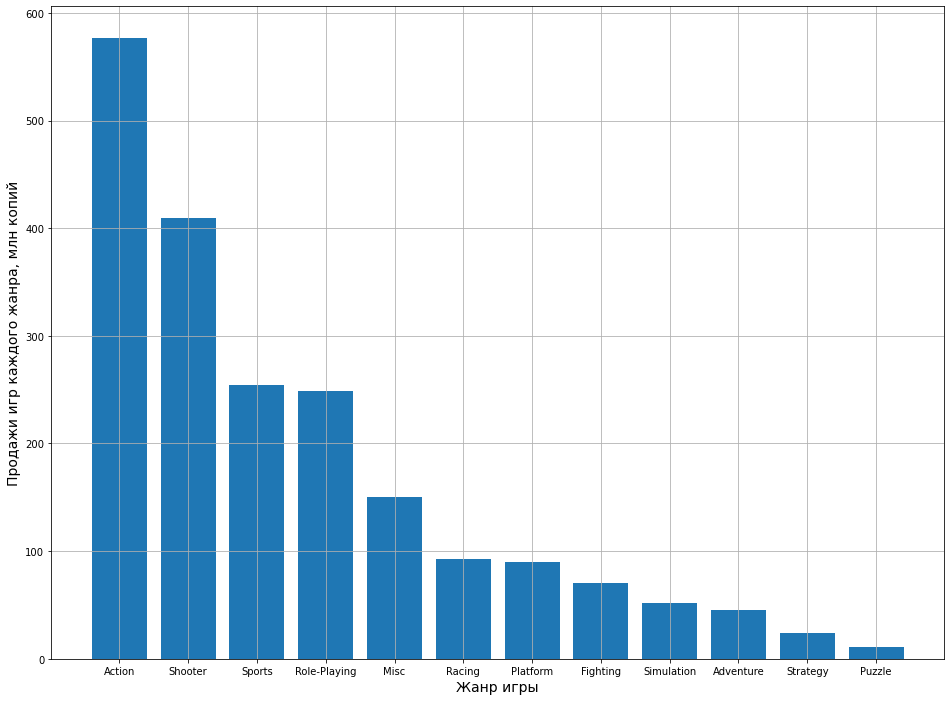

In [18]:
#Построим общее распределение игр по жанрам
platform_sales_act = games_data_act.pivot_table(index= 'genre', values= 'sum_sales', aggfunc='sum').reset_index()
sorted_platform_sales_act = platform_sales_act.sort_values(by= 'sum_sales', ascending= False)
plt.figure(figsize = (16, 12))
plt.bar(sorted_platform_sales_act['genre'], sorted_platform_sales_act['sum_sales'])
plt.xlabel('Жанр игры', fontsize = 14)
plt.ylabel('Продажи игр каждого жанра, млн копий', fontsize = 14)
plt.grid(True)

К самым прибыльным жанрам я бы отнес топ-4 жанра , отображенных на гистограмме. Среди них резко выделяются игры жанров Action и Shooter. Шутер почти в 2 раза превышает по продажам спортивные игры и RPG. А вот Action почти в 3 раза - оглушительный успех жанра. Представители других жанров - это уже "вкусовщина" игроков, по продажам уступают топовым жанрам. 

[Наверх](#step7)

## Шаг 4. Составление портрета пользователя каждого игрового региона <a name="step4"></a>

In [19]:
#Составим таблички с топ-5 платформами и игровыми жанрами по продажам в разных регионах


for column in games_data_act[['na_sales', 'eu_sales', 'jp_sales']]:
    column_users = games_data_act.pivot_table(index= ['platform', 'genre'], values= column, aggfunc= 'sum').reset_index()
    display(column_users.groupby('platform')[column].sum().sort_values(ascending = False).head())
    display(column_users.groupby('genre')[column].sum().sort_values(ascending = False).head())
    

platform
X360    233.53
PS3     171.62
PS4     108.74
XOne     93.12
3DS      83.49
Name: na_sales, dtype: float64

genre
Action          240.67
Shooter         197.52
Sports          118.69
Role-Playing     84.54
Misc             76.41
Name: na_sales, dtype: float64

platform
PS3     166.18
PS4     141.09
X360    119.54
3DS      61.48
PC       58.77
Name: eu_sales, dtype: float64

genre
Action          205.50
Shooter         150.33
Sports           93.03
Role-Playing     62.77
Racing           42.44
Name: eu_sales, dtype: float64

platform
3DS    100.67
PS3     50.17
PSP     24.94
PSV     21.91
PS4     15.96
Name: jp_sales, dtype: float64

genre
Role-Playing    81.49
Action          64.64
Misc            18.69
Fighting        12.58
Platform        12.25
Name: jp_sales, dtype: float64

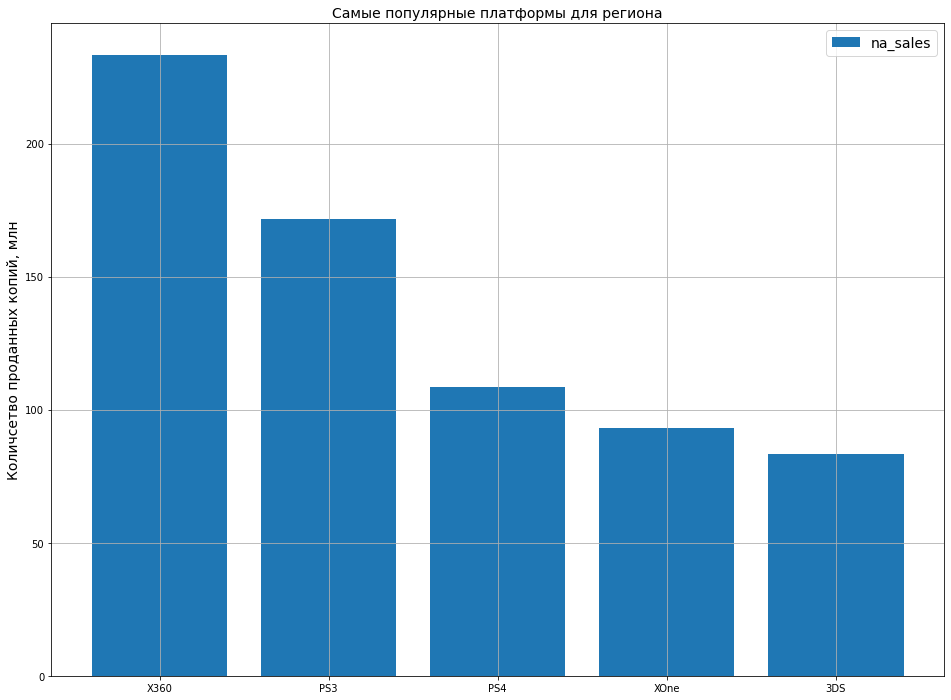

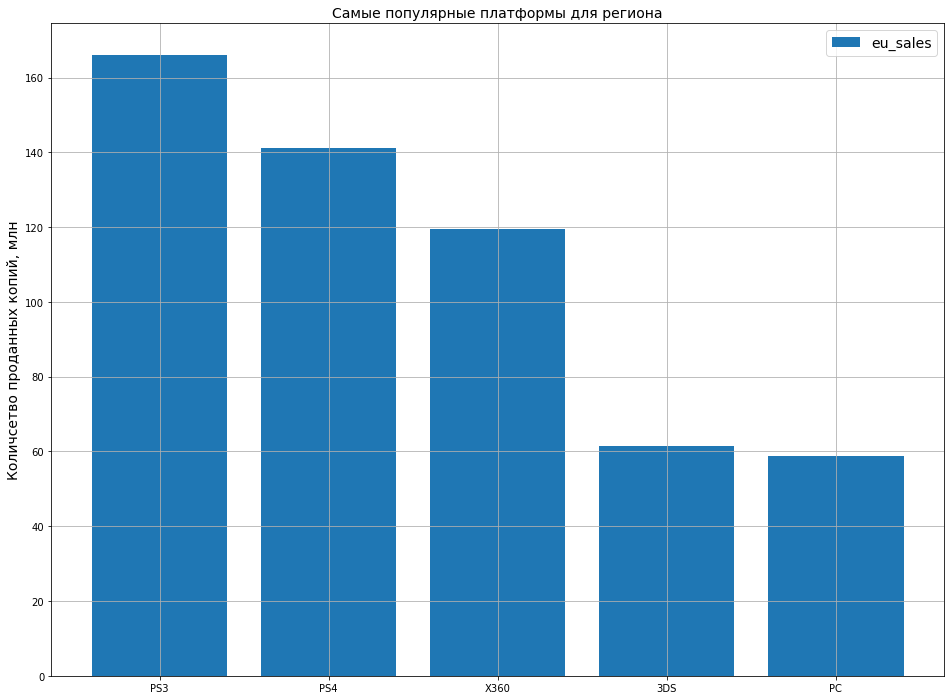

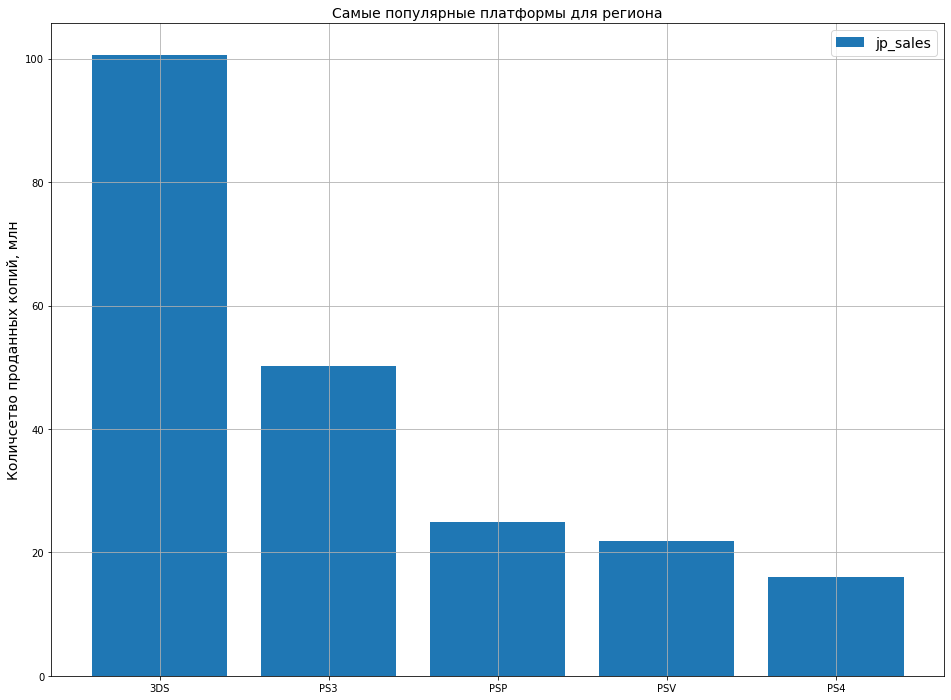

In [20]:
#Ничего не понятно, поэтому визуализируем полученную информацию

#Создадим функцию для постройки гистограмм для топ-5 платформ
def pltbar(column, data, item, name):
    column_users = games_data_act.groupby(item)[column].sum().sort_values(ascending = False).head().reset_index()
    plt.figure(figsize = (16,12))
    plt.bar(column_users[item], column_users[column], label = column)
    plt.ylabel('Количсетво проданных копий, млн', fontsize = 14)
    plt.title(label = name, fontsize = 14)
    plt.legend(fontsize = 14)
    plt.grid(True)
    plt.show()

for column in games_data_act[['na_sales', 'eu_sales', 'jp_sales']]:
    pltbar(column, games_data_act, 'platform', 'Самые популярные платформы для региона')

Среди игроков Североамериканского и Европейского регионов наиболее популярны Xbox360 и Playstation, японцы предпочитают родную Nintendo, причем разрыв в продажах с ближайшим конкурентом - PS3 более чем двукратный.

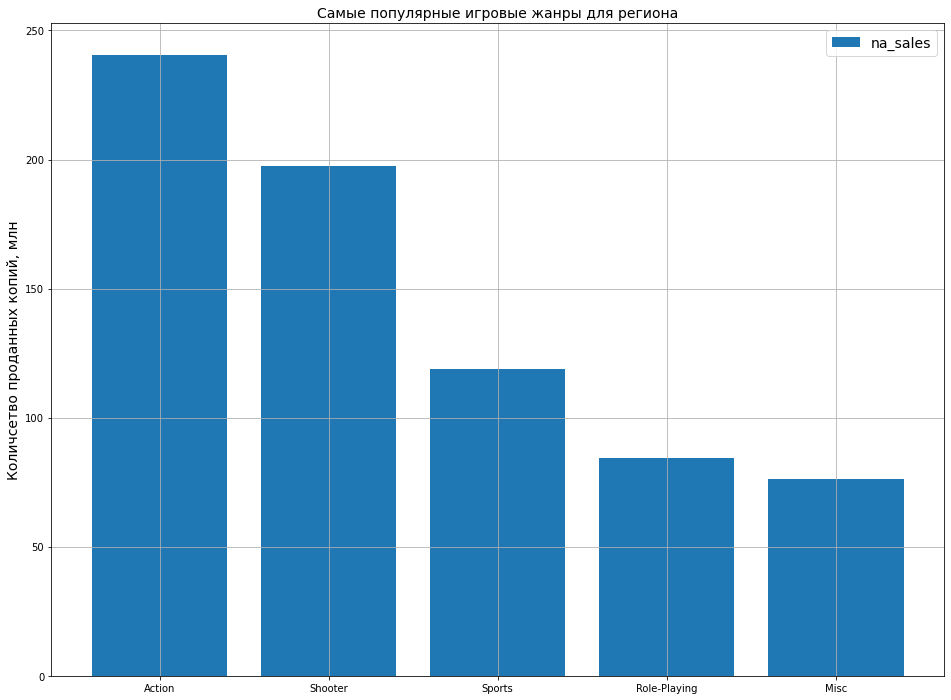

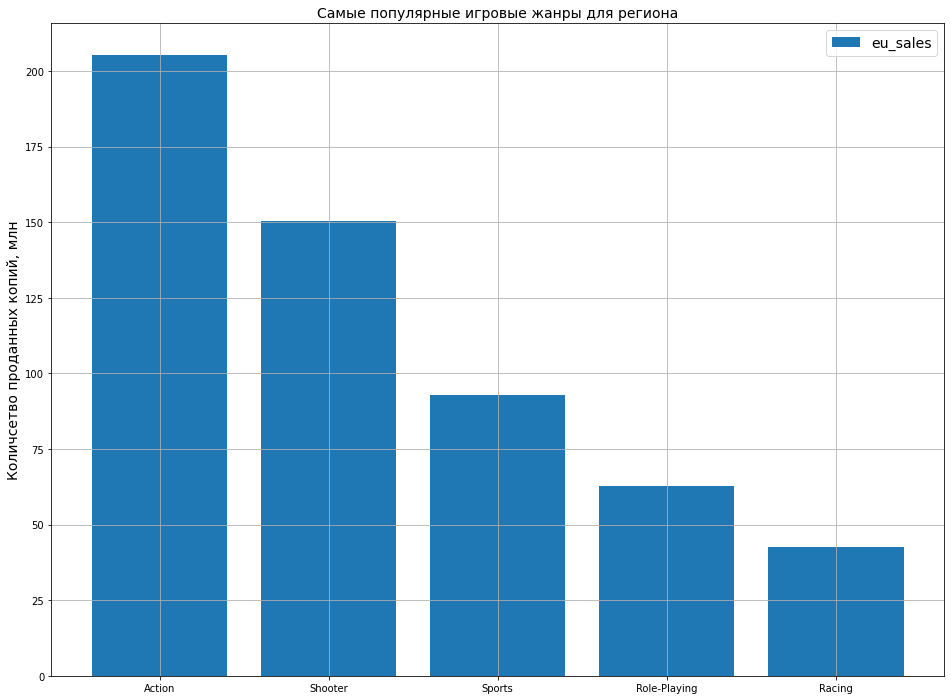

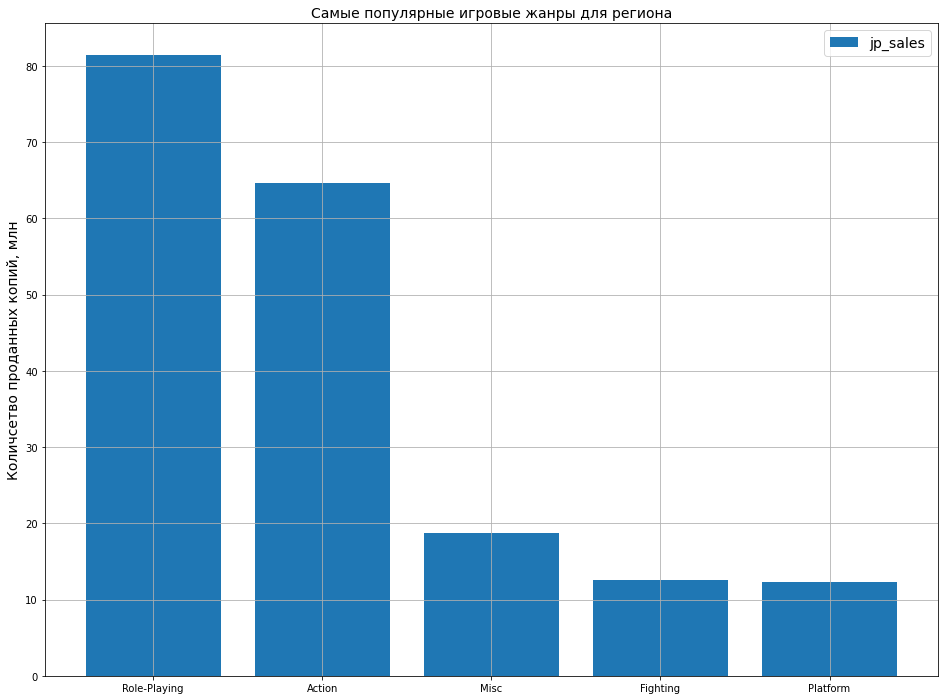

In [21]:
#Теперь визуализируем данные по топ-5 жанрам по регионам
for column in games_data_act[['na_sales', 'eu_sales', 'jp_sales']]:
    pltbar(column, games_data_act, 'genre', 'Самые популярные игровые жанры для региона')

Между американцами и европейцами наблюдается сходство в жанровых предпочтениях - лидеры Action, Shooter и Sports. Японцы предпчитают более вдумчивый гейминг - лидером является жанр Role-Playing, но и не против Action'а. Так же на этих гистограммах подтверждается лидерство жанра Action по всему миру

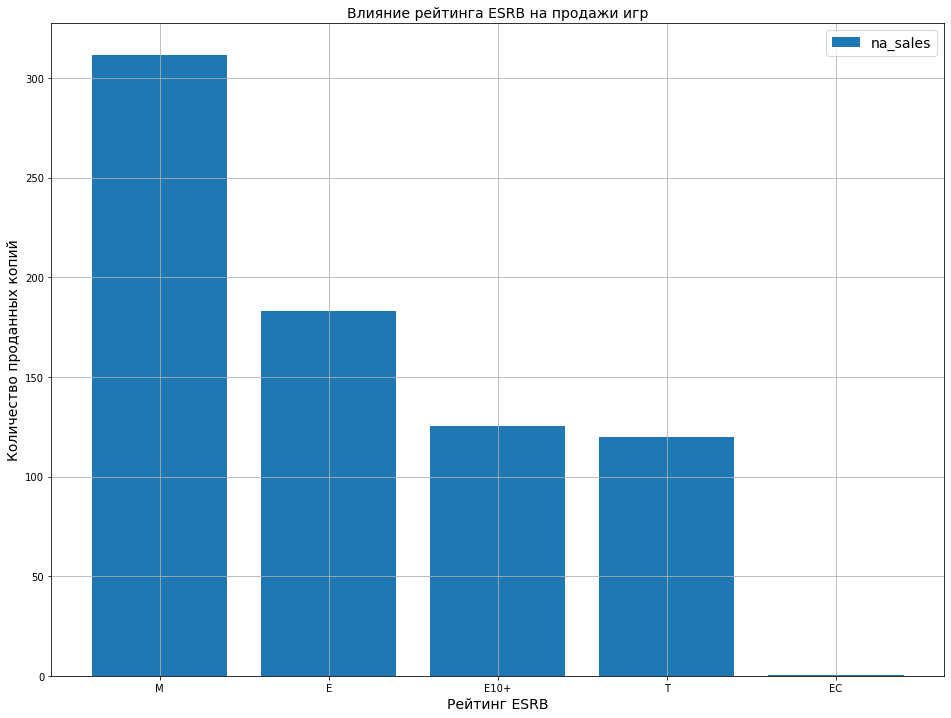

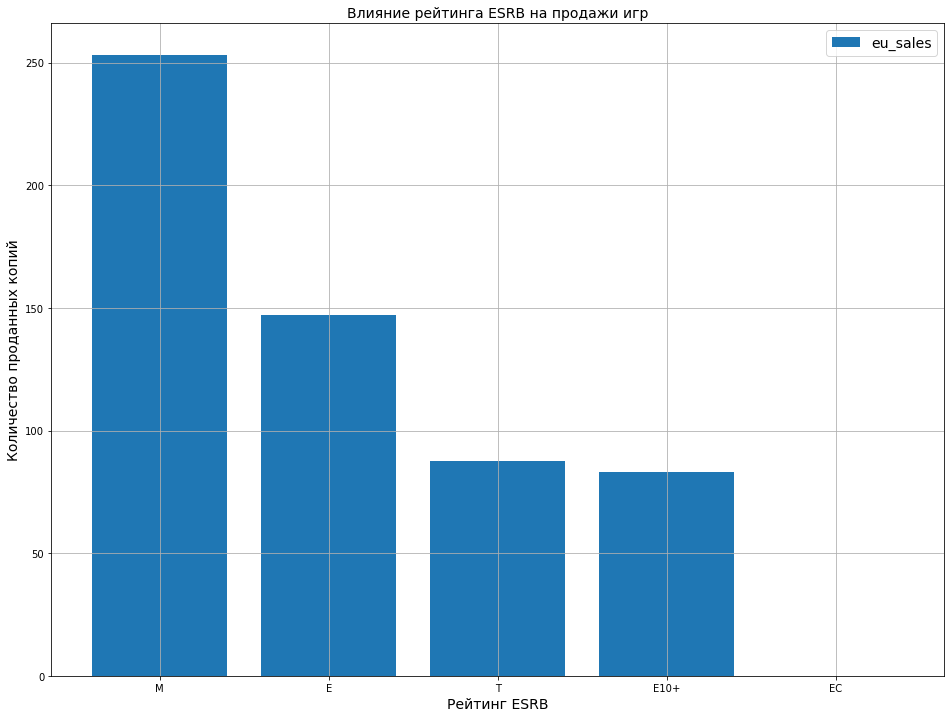

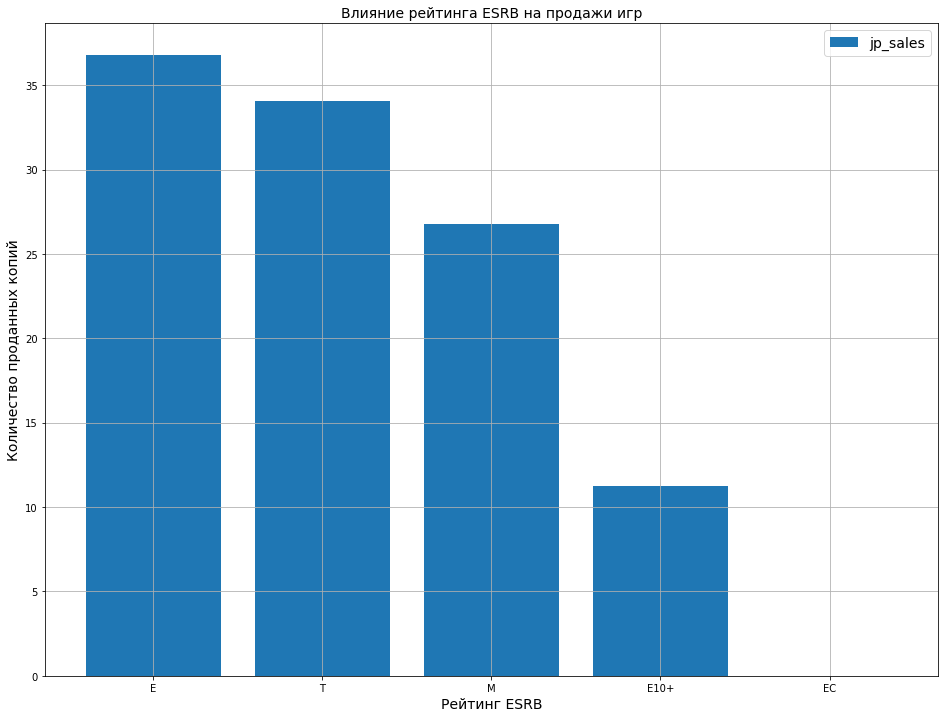

In [22]:
#Зависимость продажи от рейтинга ESRB по регионам.

#Создаем срез данных

sales_query = games_data_act[['na_sales', 'eu_sales', 'jp_sales', 'rating']]
sales_query['rating'] = sales_query[sales_query['rating'] != 'RP']['rating'] #исключаем из рассмотрения игры с неизвестным рейтингом


def pltbar1(column, data):
    column_esrb = data.groupby('rating')[column].sum().reset_index().sort_values(by = column, ascending = False)
    plt.figure(figsize = (16,12))
    plt.bar(column_esrb['rating'], column_esrb[column], label = column)
    plt.xlabel('Рейтинг ESRB', fontsize = 14)
    plt.ylabel('Количество проданных копий', fontsize = 14)
    plt.title('Влияние рейтинга ESRB на продажи игр', fontsize = 14)
    plt.legend(fontsize = 14)
    plt.grid(True)
    plt.show()

for column in sales_query[['na_sales', 'eu_sales', 'jp_sales']]:
    pltbar1(column, sales_query)


Промежуточный вывод: в странах Европы и Северной Америки рейтинг ESRB значительно влияет на уровень продаж игр. Компании-разработчики стараются охватить значительную часть населения - взрослых (рейтинг М - Mature), чуть похуже обстоят дела с играми имеющими рейтинг "для всех катагорий населения" (рейтинг Е - everyone). В Японии же основными потребителями контента являются подростки (рейтинг T - teenager). Однако в стране восходящего солнца гораздо лучше обстоят дела с широким охватом аудитории (рейтинг E - everyone). Во всех странах пониже уровень продаж для детей (рейтинги EC - early childhood, E10+ - дети до 10 лет), что неудивительно, предъявляются строгие требования от организации ESRB (минимум насилия, отстутствие сцен курения табака, употребления алкоголя и прочее).

[Наверх](#step7)

## Шаг 5. Проверка гипотез <a name="step5"></a>

## 1) Средний пользовательский рейтинг XboxOne и PC одинаков

In [23]:
#создаём выборки
xbox = games_data_act[games_data_act['platform'] == 'XOne']
sample1 = xbox[xbox['user_score'] != 0]['user_score']

pc = games_data_act[games_data_act['platform'] == 'PC']
sample2 = pc[pc['user_score'] != 0]['user_score']

print(np.var(sample1, ddof = 1))
print(np.var(sample2, ddof = 1))
#дисперсии выборок не равны, используем t-test Уэлча

alpha = 0.05

results = st.ttest_ind(sample1, sample2, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.9069968429360702
2.571490489735106
p-значение: 0.7164915830885942
Не удалось отвергнуть нулевую гипотезу


Проверялась нулевая гипотеза: средние пользовательские рейтинги XboxOne и PC равны. Перед проведением t-теста проверялось предположение о гомогенности дисперсий выборок данных. Вычисленные дисперсии получились неравными, поэтому применялся t-тест Уэлча. Результаты теста не позволяют отвергнуть нулевую гипотезу, поэтому можно предположить, что средние пользовательские рейтинги XboxOne и PC равны с вероятностью в 72%. 

## 2) Средние пользовательские рейтинги жанров Action и Sports равны

In [24]:
#создадим выборки
action = games_data_act[games_data_act['genre'] == 'Action']
sample3 = action[action['user_score'] != 0]['user_score']

sports = games_data_act[games_data_act['genre'] == 'Sports']
sample4 = sports[sports['user_score'] != 0]['user_score']

print(np.var(sample3, ddof = 1))
print(np.var(sample4, ddof = 1))
#дисперсии выборок не равны, используем t-test Уэлча

alpha = 0.05

results = st.ttest_ind(sample3, sample4, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8112266616330053
2.8942679045092854
p-значение: 2.248790731240572e-17
Отвергаем нулевую гипотезу


Проверялась нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны. Перед проведением t-теста проверялась теория о гомогенности дисперсий исходных выборок данных. Вычисленные дисперсии получились неравными, поэтому применялся t-тест Уэлча. Результаты теста позволяют отвергнуть нулевую гипотезу, поэтому можно предположить, что средние пользовательские рейтинги жанров Action и Sports не равны. 

[Наверх](#step7)

## Общий вывод и рекомендации заказчику исследования <a name="step6"></a>

По итогам проведенного анализа попытаемся спрогнозировать поевдение рынка видеоигр для определения приоритетов развития интернет-магазина "Стримчик". В процессе анализа выявлены закономерности, определяющие успешность продоваемых игр.

Для того, чтобы следующий год прошел продуктивно и с доходом необходимо обратить внимание на следующие игры:
   1. совместимые с игровыми платформами XboxOne, PS4, Nintendo 3DS. В в засимости от региона продаж можно делать упор на конкретную платформу (для Америки XBox, для Европы Playstation, для Японии Nintendo);
   2. принадлежащие к следующим жанрам - Action (лидер продаж), Shooter и Sports для американцев и еврорейцев, RPG для японцев;
   3. поменьше игр с рейтингом EC, E10+ - детский контент слишком специфичен, а основные потребители игрового контента - teenager'ы и взрослые. Игры с рейтингом E - отличный вариант, помогает охватить широкую аудиторию;
   4. ну и не стоит забывать об оценках игрокритиков и пользователей - лучше избегать продуктов с оценками ниже 50 от игрокритиков и 5.0 от игроков.

[Наверх](#step7)